In [2]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import os
import time
import gc

In [3]:
liquor_df = pd.read_csv(r'C:/Users/douge/Python Notebooks/Iowa_Liquor_Sales.csv',dtype={'City':'string','County':'string'},nrows=5000000)

C:\Users\douge\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6,14,18,19,20,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [186]:
#I wanna see ALL columns
pd.set_option('display.max_columns', None)
liquor_df.head(40)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year
0,INV-26826500064,04/24/2020,2550,Hy-Vee Food Store / Osceola,510 West Mclane,Osceola,50213,POINT (-93.77321 41.030569),20.0,CLARKE,1031200.0,American Flavored Vodka,380.0,Phillips Beverage,41692,UV Blue Raspberry,6,"1,750",11.5,17.25,2,32.98,3.50,0.92,2020
1,INV-26837100046,04/27/2020,2648,Hy-Vee #4 / WDM,555 S 51st St,West Des Moines,50265,POINT (-93.773557 41.561197),77.0,POLK,1041100.0,American Dry Gins,566.0,"Foundry Distilling Company, LLC",30016,Foundry Gin,12,375,6.66,9.99,6,59.94,2.25,0.59,2020
2,INV-26850900034,04/27/2020,5708,Brothers Market,103 W. Walnut,Williamsburg,52361,POINT (-91.831646 41.881618),48.0,IOWA,1081400.0,American Schnapps,65.0,Jim Beam Brands,82820,Dekuyper Strawberry Pucker,12,750,6.5,9.75,3,29.25,2.25,0.59,2020
3,INV-26840600004,04/27/2020,2614,Hy-Vee #3 Food & Drugstore / Davenport,1823 E Kimberly Rd,Davenport,52807,POINT (-90.548919 41.55678100000001),82.0,SCOTT,1071100.0,Cocktails /RTD,35.0,BACARDI USA INC,56856,Bacardi Bahama Mama RTS,6,"1,750",9.53,14.3,6,85.80,10.50,2.77,2020
4,INV-26828600009,04/24/2020,3660,Wal-Mart 2935 / Knoxville,814 W Bell Ave,Knoxville,50138,POINT (-93.106728 41.306176),63.0,MARION,1082200.0,Imported Schnapps,421.0,SAZERAC COMPANY INC,69637,Dr McGillicuddys Cherry,12,"1,000",11,16.5,12,198.00,12.00,3.17,2020
5,INV-26851800001,04/27/2020,4540,Casey's General Store #2915 / Bellevue,1104 N Riverview St,Bellevue,52031,POINT (-90.427844 42.268432),49.0,JACKSON,1031100.0,American Vodkas,55.0,SAZERAC NORTH AMERICA,35315,Barton Vodka PET,12,750,3.37,5.06,6,30.36,4.50,1.18,2020
6,INV-26817200032,04/24/2020,4805,Liquor Tobacco & Grocery / Fort Dodge,902 1st Ave N,Fort Dodge,50501,POINT (-94.186138 42.506332),94.0,WEBSTER,1082000.0,Imported Cordials & Liqueurs,192.0,"Mast-Jagermeister US, Inc",65256,Jagermeister Liqueur,12,750,13,19.5,12,224.16,9.00,2.37,2020
7,INV-26840000016,04/27/2020,2512,Hy-Vee Wine and Spirits / Iowa City,1720 Waterfront Dr,Iowa City,52240,POINT (-91.53046300000001 41.642764),52.0,JOHNSON,1022200.0,100% Agave Tequila,619.0,Campari America,87619,Espolon Blanco,6,750,14,21,24,504.00,18.00,4.75,2020
8,INV-26823200092,04/24/2020,2613,Hy-Vee Food Store #1 / Council Bluffs,2323 W Broadway,Council Bluffs,51501,POINT (-95.879662 41.261925),78.0,POTTAWATTAMIE,1032100.0,Imported Vodkas,35.0,BACARDI USA INC,34425,Grey Goose,6,"1,750",35.42,53.13,2,106.26,3.50,0.92,2020
9,INV-26818300005,04/24/2020,4775,Casey's General Store #37 / Dakota City,"502, Main",Dakota City,50529,POINT (-94.200785 42.721419),46.0,HUMBOLDT,1012100.0,Canadian Whiskies,259.0,Heaven Hill Brands,11788,Black Velvet,6,"1,750",10.45,15.68,1,15.68,1.75,0.46,2020


In [4]:
liquor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   string 
 6   Zip Code               object 
 7   Store Location         object 
 8   County Number          float64
 9   County                 string 
 10  Category               float64
 11  Category Name          object 
 12  Vendor Number          float64
 13  Vendor Name            object 
 14  Item Number            object 
 15  Item Description       object 
 16  Pack                   int64  
 17  Bottle Volume (ml)     object 
 18  State Bottle Cost      object 
 19  State Bottle Retail    object 
 20  Bottles Sold           object 
 21  Sale (Dollars)         object 
 22  Volume Sold (Liter

In [5]:
liquor_df.dropna(axis=0,inplace=True)

In [6]:
#have to convert some columns to int
liquor_df['Bottles Sold'].replace(to_replace=',', value='', inplace=True,regex=True)
liquor_df['Bottles Sold'] = liquor_df['Bottles Sold'].astype('int64')

liquor_df['Sale (Dollars)'].replace(to_replace=',', value='', inplace=True,regex=True)
liquor_df['Sale (Dollars)'] = liquor_df['Sale (Dollars)'].astype('float64')

In [7]:
liquor_df['County'] = liquor_df['County'].map(str.upper)

In [9]:
#group1 = df['dataset1'].groupby(df['k1'])    ----   example of groupby. let's try to group bottle counts and $ by county
bottles_by_county_group = liquor_df['Bottles Sold'].groupby(liquor_df['County'])

In [10]:
#avg # of bottles per transaction
bottles_by_county_group.mean().sort_values(axis=0,ascending=False)

County
DALLAS       15.489783
FREMONT      13.500624
POLK         12.985603
SCOTT        12.816316
SHELBY       12.301135
               ...    
MONONA        4.548658
MITCHELL      4.494688
KEOKUK        4.396295
PALO ALTO     4.237886
ADAMS         3.509311
Name: Bottles Sold, Length: 103, dtype: float64

In [11]:
#total # of bottles sold by county. but wait.... the counties appear twice. Oh. One is UPPER; the other is Sentence. Will need to convert and combine.
bottles_by_county_group.sum().sort_values(axis=0,ascending=False)

County
POLK          10390080
LINN           4283865
SCOTT          3371050
BLACK HAWK     3045265
JOHNSON        2721332
                ...   
WAYNE            21923
DAVIS            18946
FREMONT          10814
ADAMS            10742
LUCAS            10653
Name: Bottles Sold, Length: 103, dtype: int64

In [12]:
#group1 = df['dataset1'].groupby(df['k1'])    ----   example of groupby. let's try to group bottle counts and $ by county
dollars_by_county_group = liquor_df['Sale (Dollars)'].groupby(liquor_df['County'])

In [13]:
#total $ sold by county. 
dollars_by_county_group.sum().sort_values(axis=0,ascending=False)

County
POLK          1.404029e+08
LINN          5.456822e+07
SCOTT         4.163864e+07
JOHNSON       3.927202e+07
BLACK HAWK    3.542186e+07
                  ...     
TAYLOR        2.610232e+05
DAVIS         2.391399e+05
ADAMS         1.454554e+05
LUCAS         1.309963e+05
FREMONT       9.905034e+04
Name: Sale (Dollars), Length: 103, dtype: float64

In [14]:
#avg $ of transaction. 
dollars_by_county_group.mean().sort_values(axis=0,ascending=False)

County
DALLAS      271.697881
POLK        175.476618
CARROLL     174.600092
JOHNSON     170.008015
CRAWFORD    169.685200
               ...    
MITCHELL     58.589493
MONONA       55.892613
TAYLOR       53.576190
KEOKUK       49.201229
ADAMS        47.518922
Name: Sale (Dollars), Length: 103, dtype: float64

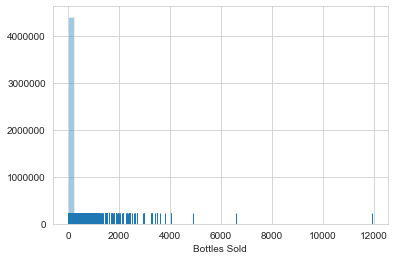

In [21]:
sns.distplot(liquor_df['Bottles Sold'], kde=False, rug=True);

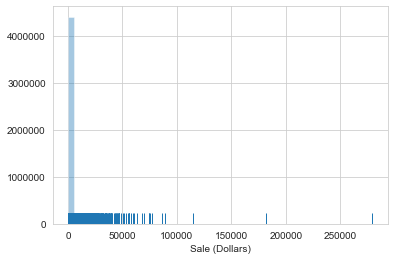

In [22]:
sns.distplot(liquor_df['Sale (Dollars)'], kde=False, rug=True);

(0, 3000)

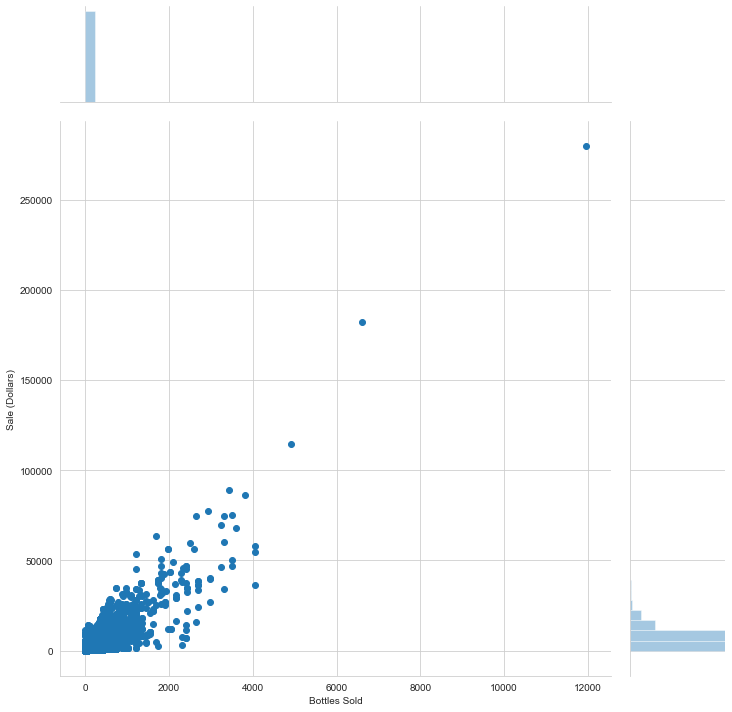

In [47]:
#first attempt at visualizing; wow, what an outlier! seriously, who bought so much alcohol at once?
sns.jointplot('Bottles Sold','Sale (Dollars)',liquor_df,height=10);
axes = plt.gca()
axes.set_xlim([0,3000])

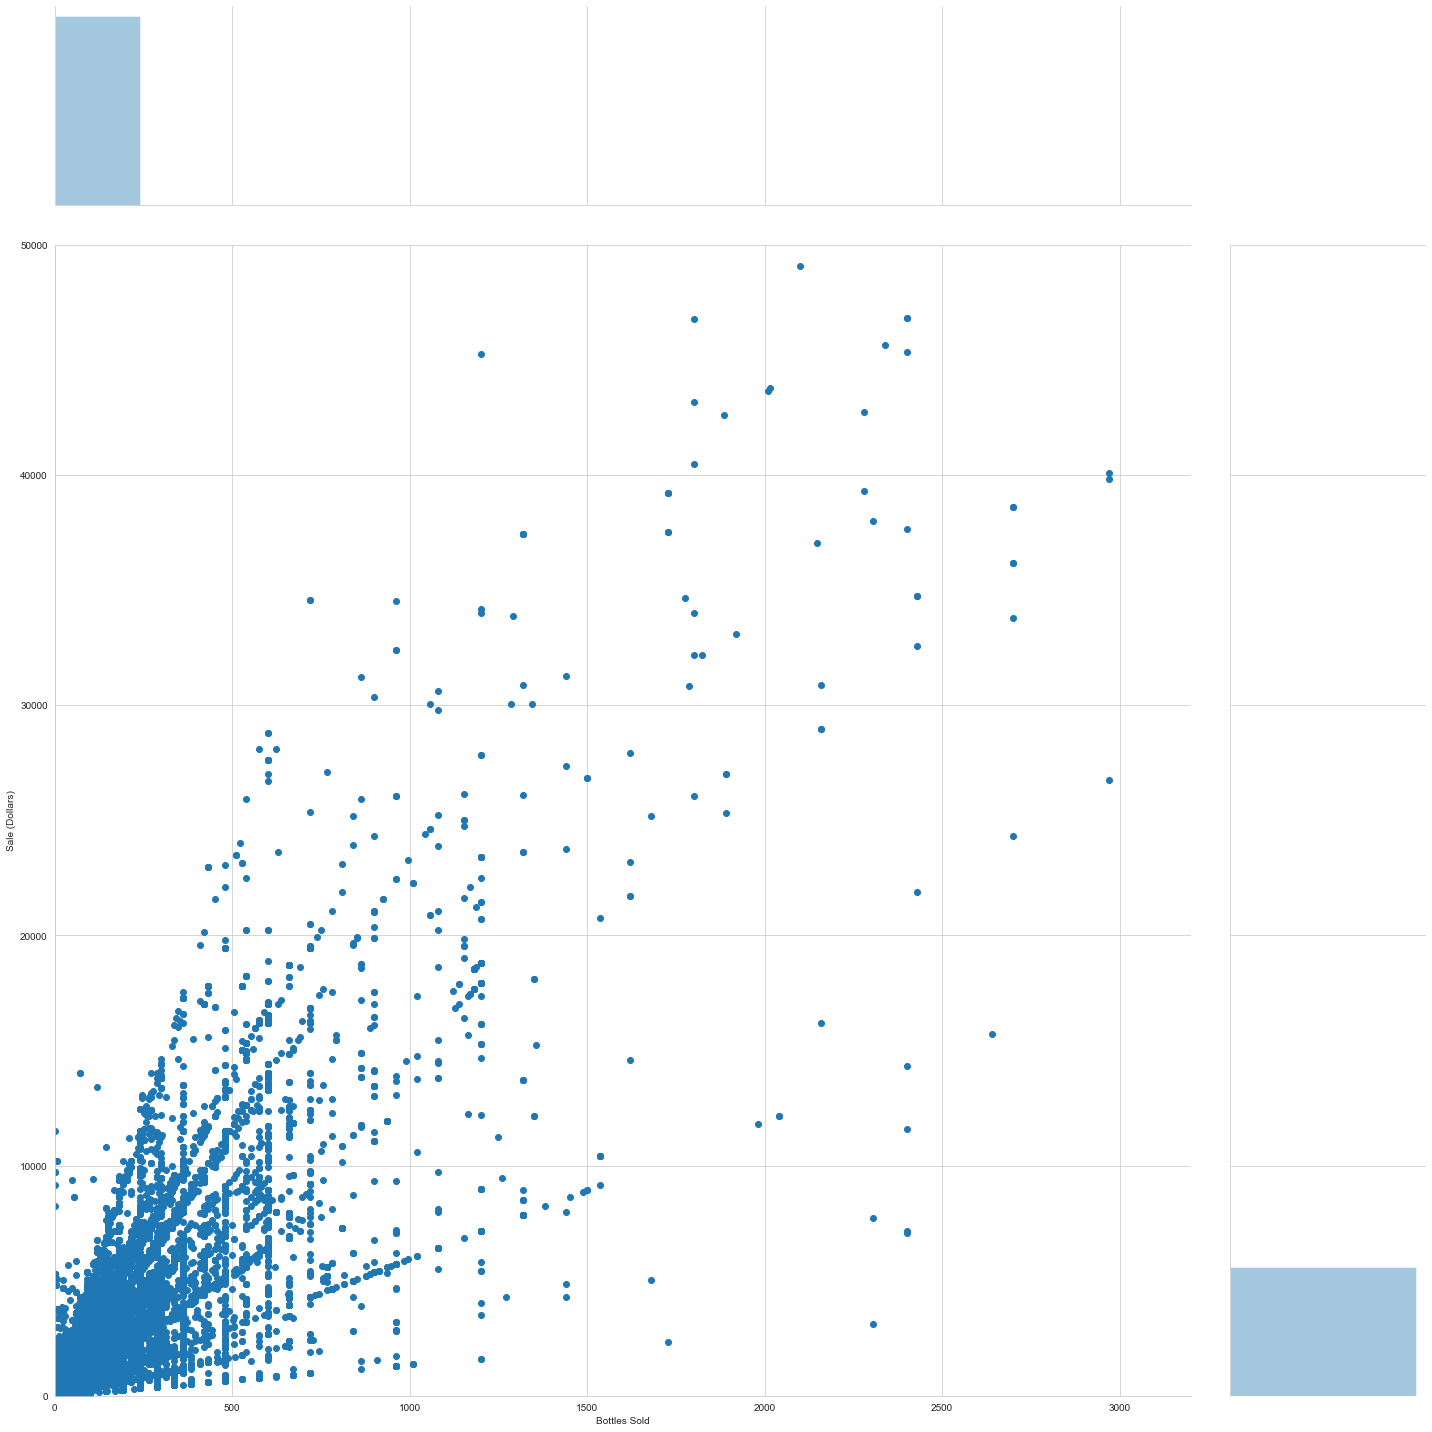

In [45]:
#unsurprisingly, a very strong correlation between bottles sold and sales ($)
sns.jointplot('Bottles Sold','Sale (Dollars)',liquor_df,xlim = (0,3200), ylim = (0,50000),height=20)

In [15]:
liquor_df['Bottles Sold'].value_counts().sort_index()

0             7
1        537249
2        600588
3        438388
4        238727
          ...  
3804          1
4050          3
4908          1
6600          1
11952         1
Name: Bottles Sold, Length: 362, dtype: int64

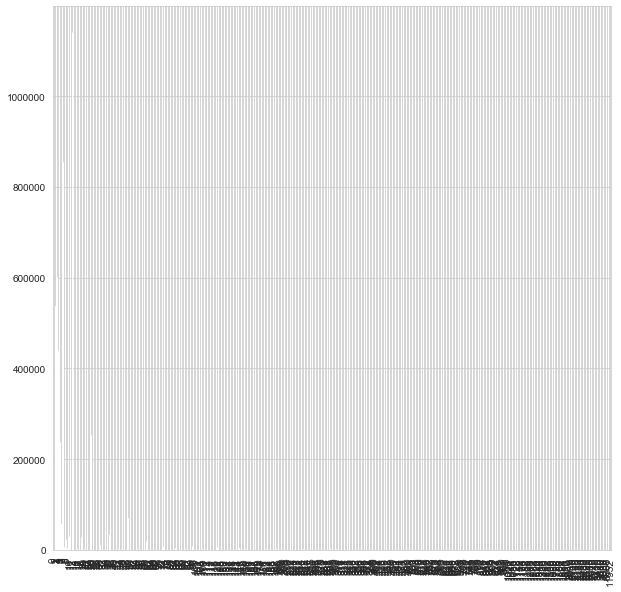

In [101]:
#look how I just built on shit, oh yeah! technically you can see it but it's awfully hard
liquor_df['Bottles Sold'].value_counts().sort_index().plot(kind='bar',figsize=(10,10))

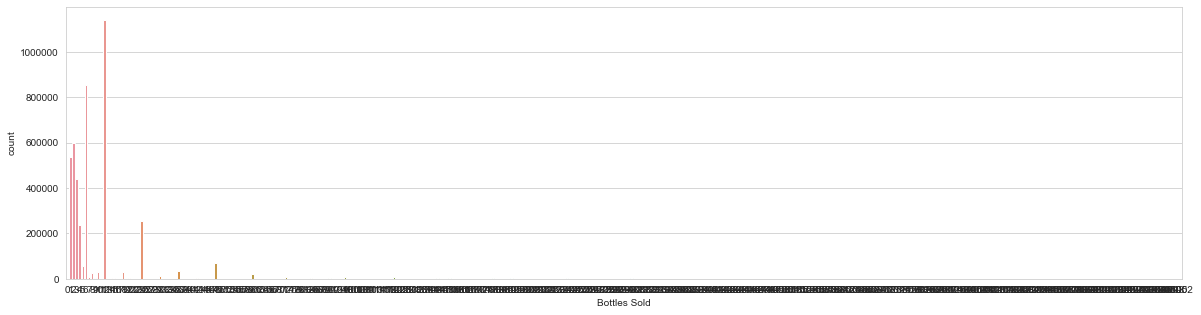

In [81]:
plt.figure(figsize=(20,5))
sns.countplot('Bottles Sold',data=liquor_df)

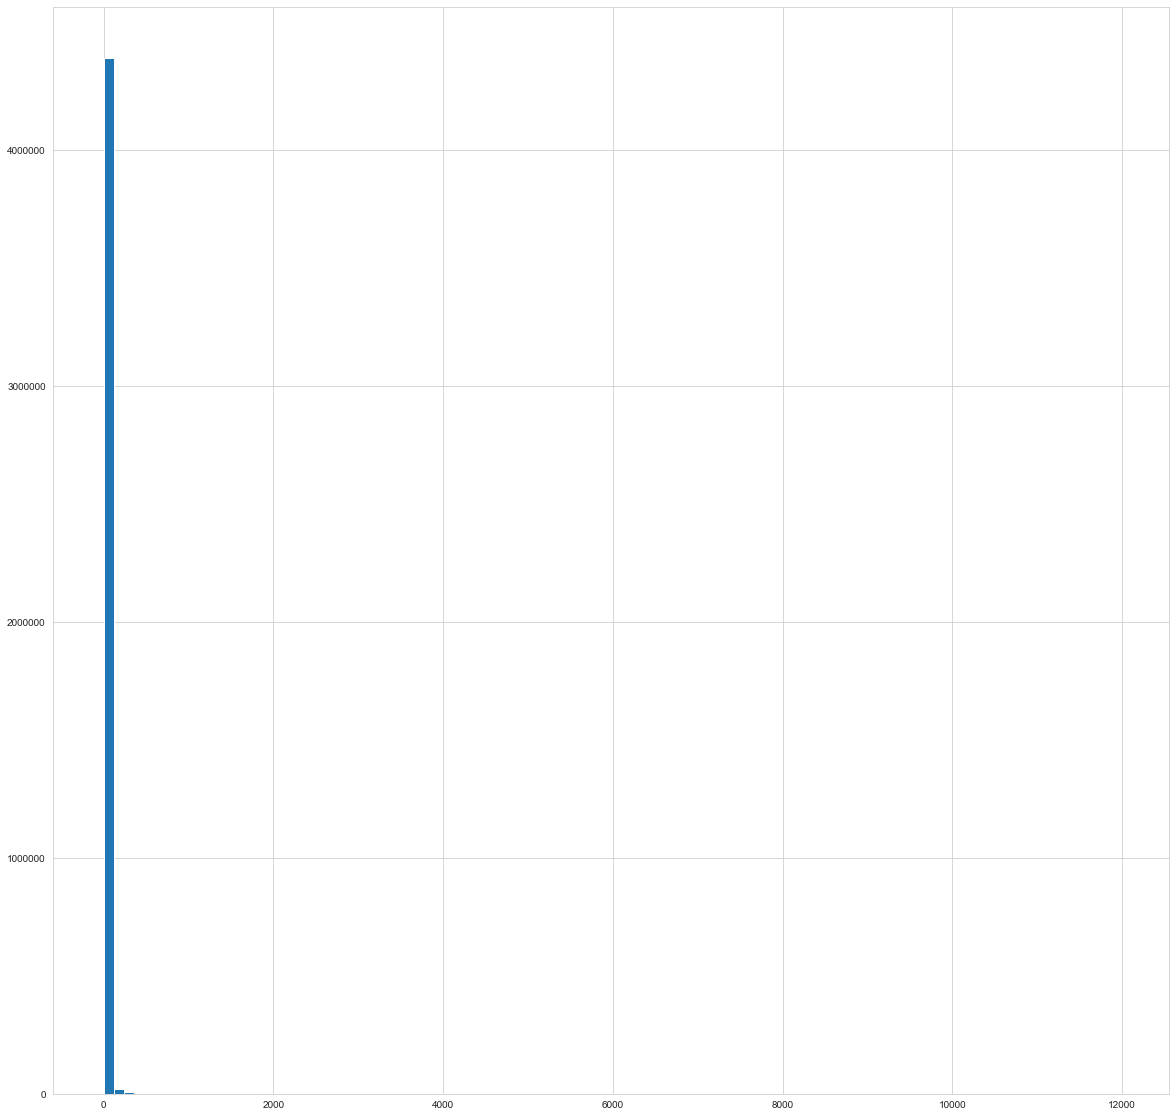

In [87]:
liquor_df['Bottles Sold'].hist(bins=100,figsize=(20,20))

In [58]:
liquor_df['Date'] = pd.to_datetime(liquor_df['Date'])

In [9]:
liquor_df['Year'] = pd.DatetimeIndex(liquor_df['Date']).year

In [8]:
liquor_df['Date'].min()

'01/02/2013'

In [10]:
liquor_df['Year'].min()

2012

let's see purchases over time for the top 10 stores. actually first, by top 10 counties.

In [11]:
top10counties = bottles_by_county_group.sum().sort_values(axis=0,ascending=False).head(10)

NameError: name 'bottles_by_county_group' is not defined

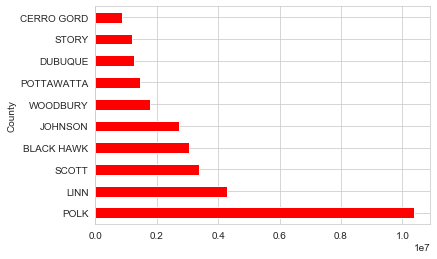

In [19]:
top10counties.plot(kind='barh',cmap='rainbow_r')

In [12]:
countydatesales_pivot = pd.pivot_table(liquor_df,'Bottles Sold','Year','County',aggfunc='sum',margins=True)

In [13]:
countydatesales_pivot

County,ADAIR,ADAMS,ALLAMAKEE,APPANOOSE,AUDUBON,BENTON,BLACK HAWK,BOONE,BREMER,BUCHANAN,...,WARREN,WASHINGTON,WAYNE,WEBSTER,WINNEBAGO,WINNESHIEK,WOODBURY,WORTH,WRIGHT,All
Year,,,,,,,,,,,,,,,,,,,,,
2012,27.0,23.0,72.0,49.0,20.0,39.0,915.0,144.0,103.0,48.0,...,60.0,72.0,NaN,77.0,58.0,45.0,258.0,14.0,20.0,11644
2013,18.0,13.0,15.0,20.0,2.0,10.0,635.0,61.0,67.0,70.0,...,108.0,72.0,6.0,161.0,45.0,64.0,246.0,39.0,28.0,12266
2014,15.0,14.0,13.0,30.0,30.0,29.0,779.0,22.0,69.0,132.0,...,41.0,24.0,6.0,162.0,39.0,34.0,234.0,48.0,25.0,13220
2015,13.0,5.0,12.0,26.0,6.0,22.0,518.0,44.0,36.0,116.0,...,23.0,114.0,24.0,159.0,28.0,12.0,488.0,21.0,24.0,12344
2016,26237.0,4968.0,29608.0,51933.0,10204.0,40435.0,965550.0,88360.0,92538.0,73067.0,...,66638.0,86715.0,5633.0,185510.0,46075.0,71840.0,527202.0,13767.0,35963.0,14356995
2017,29492.0,4393.0,33668.0,58415.0,9631.0,47103.0,1145721.0,116103.0,104453.0,81703.0,...,90343.0,106150.0,7852.0,218221.0,52497.0,79568.0,672268.0,19026.0,52891.0,17423125
2018,18008.0,1174.0,19196.0,31591.0,8215.0,31592.0,677431.0,68594.0,67866.0,38459.0,...,53514.0,72596.0,5711.0,139446.0,28721.0,43587.0,416450.0,11040.0,31518.0,10809087
2019,5724.0,NaN,5613.0,11759.0,2221.0,11850.0,221165.0,28248.0,18007.0,12785.0,...,17073.0,19976.0,1940.0,49796.0,9547.0,12894.0,138749.0,4502.0,10566.0,3469387
2020,614.0,152.0,734.0,1306.0,458.0,1599.0,32551.0,82.0,3273.0,1388.0,...,3415.0,3808.0,751.0,7008.0,1294.0,1592.0,20578.0,350.0,1335.0,497160


In [196]:
## this was a test! aborted.
new_little_df = liquor_df[['County','Date','Bottles Sold']]
#since it didn't work, deleting!
del new_little_df

In [14]:
gc.collect()

48

In [31]:
new_little_df.info()

NameError: name 'new_little_df' is not defined

In [124]:
new_little_df = new_little_df['Bottles Sold'].groupby(new_little_df['County'])

In [131]:
new_little_df.sort_values(by='Bottles Sold',ascending=False,inplace=True)

C:\Users\douge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [136]:
new_little_df.set_index('Date')

,County,Bottles Sold
Date,,
2018-10-02,POLK,11952
2016-04-25,POLK,6600
2017-10-05,POLK,4908
2017-04-25,DALLAS,4050
2017-10-24,JOHNSON,4050
...,...,...
2017-04-12,SCOTT,0
2016-08-31,MARION,0
2016-10-06,DALLAS,0


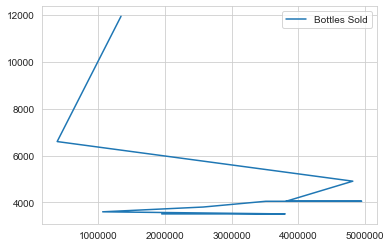

In [140]:
new_little_df.head(10).plot(y='Bottles Sold')

I have the list of top counties where bottles are sold (as a groupby object). I want to see sales over time. So, I need to do: for x in list of top counties, plot the sales vs. time from the dataframe. that is, when county (in df) == county (in list), plot the sale and date for that row. or do i just make a differe

In [ ]:
for county in bottles_by_county_group:
    
    if liquor_df['County'] == 'County':
        

In [150]:
#actually, this small_little_df is ALL the data for where county = the below
small_little_df = liquor_df[liquor_df['County'].isin(['POLK','LINN','SCOTT','BLACK HAWK','JOHNSON','WOODBURYPOTTAWATTA','DUBUQUE','STORY','CERRO GORD'])]

In [145]:
top10 = bottles_by_county_group.sum().sort_values(axis=0,ascending=False).head(10)

In [146]:
top10

County
POLK          10390080
LINN           4283865
SCOTT          3371050
BLACK HAWK     3045265
JOHNSON        2721332
WOODBURY       1776473
POTTAWATTA     1437041
DUBUQUE        1256777
STORY          1183073
CERRO GORD      877095
Name: Bottles Sold, dtype: int64

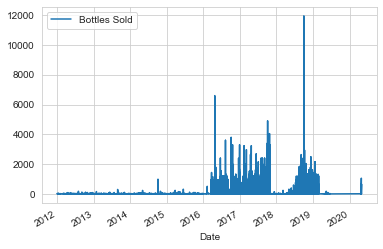

In [152]:
small_little_df.plot(x='Date',y='Bottles Sold')

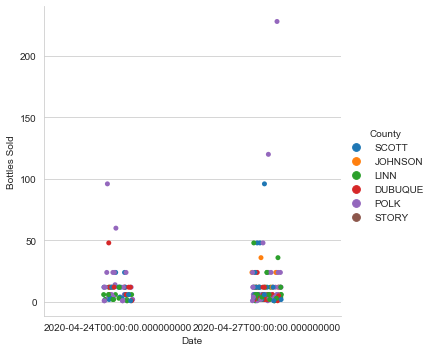

In [156]:
sns.catplot(x='Date', y='Bottles Sold', hue='County',data=small_little_df[1:200]);

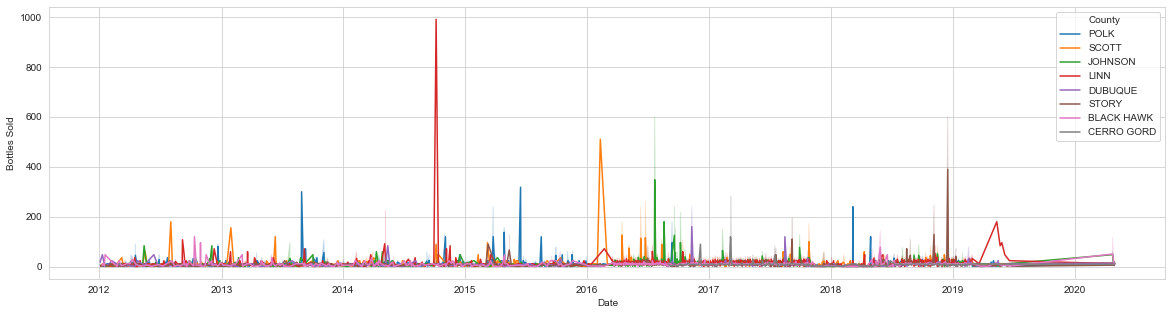

In [166]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y='Bottles Sold', hue='County',data=small_little_df);

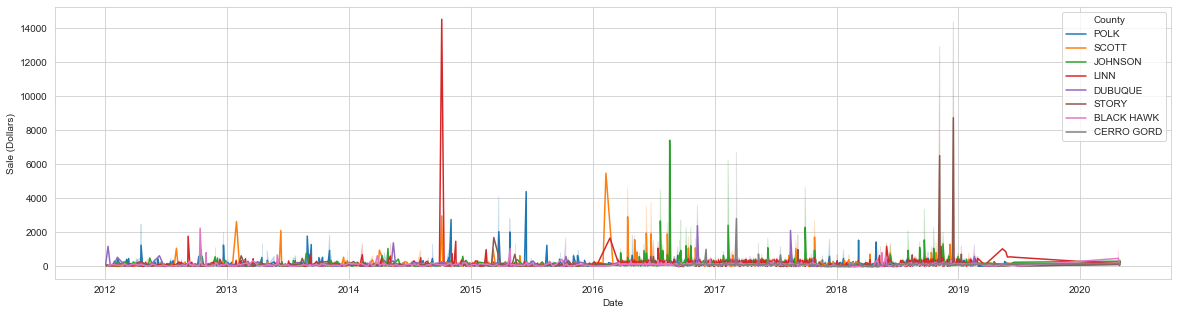

In [186]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y='Sale (Dollars)', hue='County',data=small_little_df);

there is almost a perfect correlation between Bottles sold and Dollars. The graphs look nearly identical.

In [15]:
dollars_by_storename_group = liquor_df['Sale (Dollars)'].groupby(liquor_df['Store Name'])

In [16]:
top10stores = dollars_by_storename_group.sum().sort_values(axis=0,ascending=False).head(10)

In [17]:
top10stores

Store Name
Hy-Vee #3 / BDI / Des Moines           2.294824e+07
Central City 2                         2.139730e+07
Hy-Vee Wine and Spirits / Iowa City    1.006734e+07
Sam's Club 8162 / Cedar Rapids         7.773742e+06
Wilkie Liquors                         6.495918e+06
Lot-A-Spirits                          6.055376e+06
Hy-Vee Food Store / Coralville         5.934266e+06
Benz Distributing                      5.547355e+06
Sam's Club 8238 / Davenport            5.337622e+06
Costco Wholesale #788                  4.925986e+06
Name: Sale (Dollars), dtype: float64

In [36]:
small_little_df.head()

NameError: name 'small_little_df' is not defined

In [183]:
#actually, this small_little_df is ALL the data for where county = the below
small_storename_df = liquor_df[liquor_df['Store Name'].isin(['Hy-Vee #3 / BDI / Des Moines','Central City 2','Hy-Vee Wine and Spirits / Iowa City',"Sam's Club 8162 / Cedar Rapids",'Wilkie Liquors ','Lot-A-Spirits','Hy-Vee Food Store / Coralville','Benz Distributing',"Sam's Club 8238 / Davenport",'Costco Wholesale #788'])]

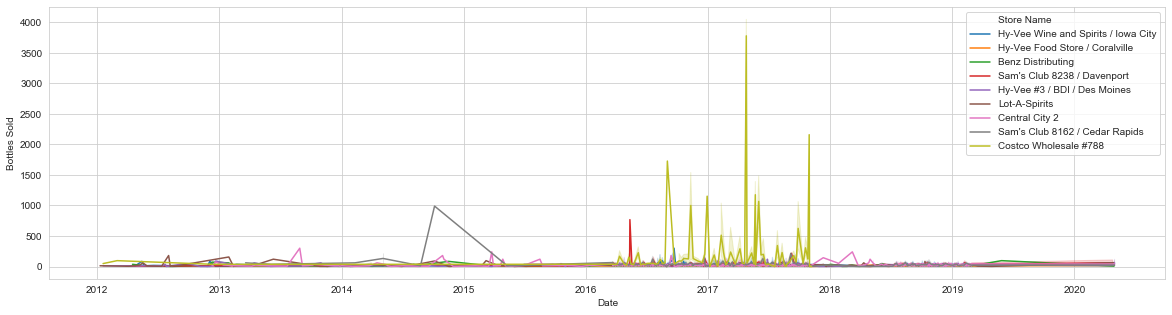

In [185]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y='Bottles Sold', hue='Store Name',data=small_storename_df);

what on earth happened to Costco?

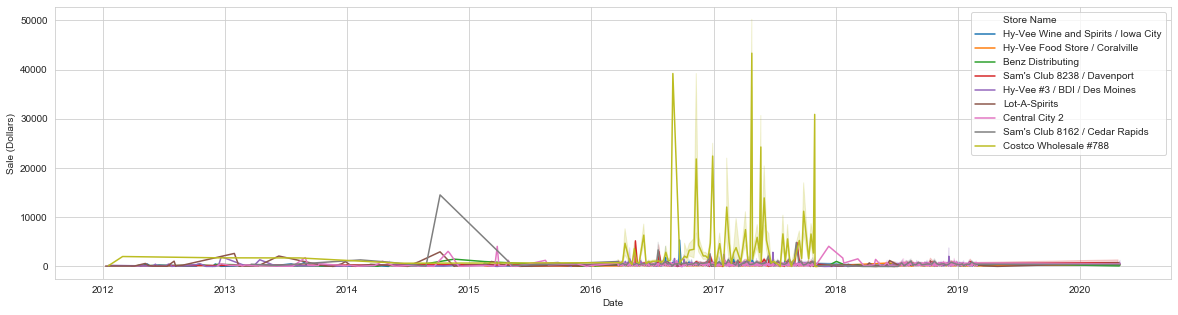

In [187]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y='Sale (Dollars)', hue='Store Name',data=small_storename_df);

In [191]:
small_storename_df.loc(small_storename_df['Store Name'] == 'Costco Wholesale #788')

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [193]:
small_storename_df[small_storename_df['Store Name'].str.contains('Costco Wholesale #788')]

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
98817,INV-00480300015,2016-09-22,3814,Costco Wholesale #788,7205 Mills Civic Pkwy,West Des Moines,50266,POINT (-93.806489 41.561342),25.0,DALLAS,1011100.0,Blended Whiskies,260.0,DIAGEO AMERICAS,25608,Seagrams 7 Crown Bl Whiskey,6,"1,750",11.96,17.94,42,753.48,73.50,19.42
125332,INV-01372100013,2016-11-03,3814,Costco Wholesale #788,7205 Mills Civic Pkwy,West Des Moines,50266,POINT (-93.806489 41.561342),25.0,DALLAS,1012300.0,Single Malt Scotch,240.0,William Grant & Sons Inc,4356,Balvenie 12yr Doublewood Single Malt Scotch,12,750,31.42,47.13,24,1245.36,18.00,4.76
139984,S03649300053,2012-01-19,3814,Costco Wholesale #788,7205 MILLS CIVIC PKWY,WEST DES MOINES,50266,POINT (-93.806489 41.561342),25.0,DALLAS,1081400.0,TRIPLE SEC,434.0,Luxco-St Louis,86251,Juarez Triple Sec,12,"1,000",2.21,3.31,48,158.88,48.00,12.68
141603,S09452200037,2012-12-13,3814,Costco Wholesale #788,7205 MILLS CIVIC PKWY,WEST DES MOINES,50266,POINT (-93.806489 41.561342),25.0,DALLAS,1012210.0,SINGLE MALT SCOTCH,240.0,"WILLIAM GRANT AND SONS, INC.",4356,Balvenie 12yr Doublewood Single Malt Scotch,12,750,32.41,48.62,36,1750.32,27.00,7.13
144641,S19421900020,2014-06-09,3814,Costco Wholesale #788,7205 MILLS CIVIC PKWY,WEST DES MOINES,50266,POINT (-93.806489 41.561342),25.0,DALLAS,1011200.0,STRAIGHT BOURBON WHISKIES,65.0,Jim Beam Brands,19067,Jim Beam,12,"1,000",12.08,18.12,36,652.32,36.00,9.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965968,INV-08278700009,2017-10-26,3814,Costco Wholesale #788,7205 Mills Civic Pkwy,West Des Moines,50266,POINT (-93.806489 41.561342),25.0,DALLAS,1042100.0,Imported Dry Gins,260.0,DIAGEO AMERICAS,28868,Tanqueray Gin,6,"1,750",24.99,37.49,72,2699.28,126.00,33.29
4967280,INV-08278700002,2017-10-26,3814,Costco Wholesale #788,7205 Mills Civic Pkwy,West Des Moines,50266,POINT (-93.806489 41.561342),25.0,DALLAS,1031100.0,American Vodkas,434.0,LUXCO INC,36308,Hawkeye Vodka,6,"1,750",7.17,10.76,84,903.84,147.00,38.83
4969321,INV-08278700011,2017-10-26,3814,Costco Wholesale #788,7205 Mills Civic Pkwy,West Des Moines,50266,POINT (-93.806489 41.561342),25.0,DALLAS,1012100.0,Canadian Whiskies,260.0,DIAGEO AMERICAS,11297,Crown Royal Canadian Whisky,12,"1,000",18.89,28.34,24,680.16,24.00,6.34
4979635,INV-00096000001,2016-09-01,3814,Costco Wholesale #788,7205 Mills Civic Pkwy,West Des Moines,50266,POINT (-93.806489 41.561342),25.0,DALLAS,1032000.0,Imported Vodka,217.0,MISA Imports Inc,987514,Kirkland Signature French Vodka,6,"1,750",14.48,21.72,1728,39191.04,"3,024.00",798.86


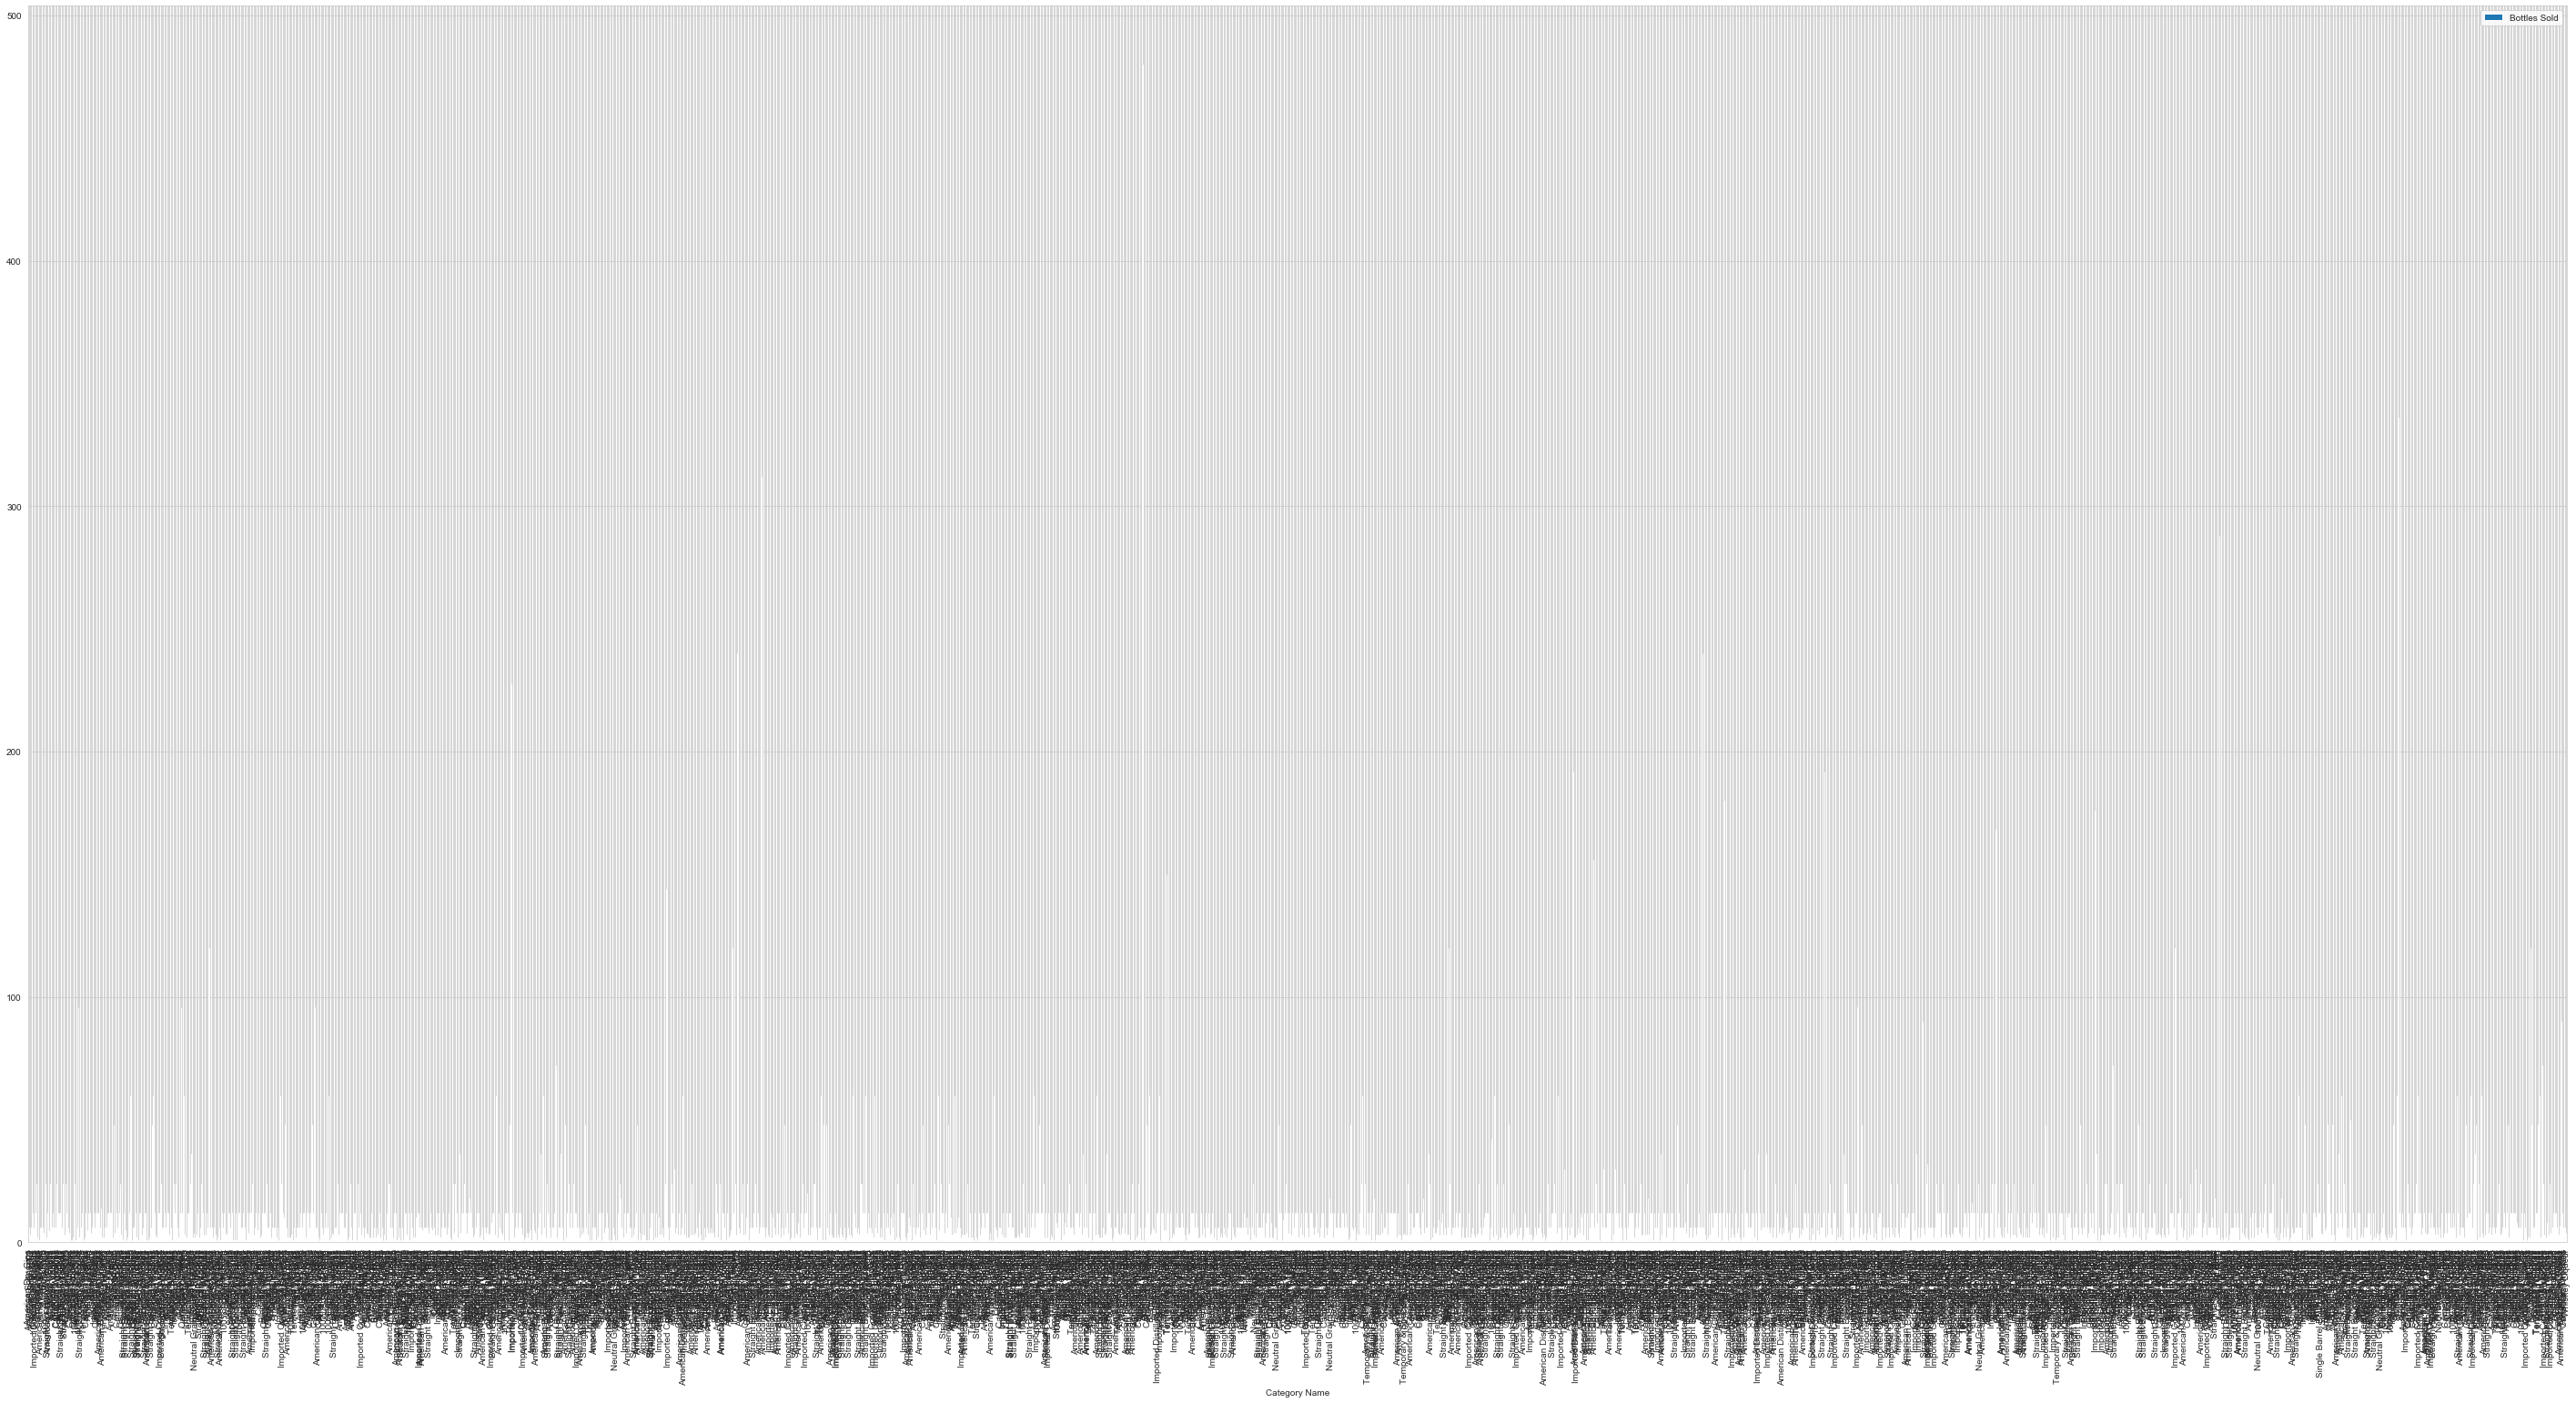

In [146]:
liquor_df[1:2000].plot(x='Category Name',y='Bottles Sold',kind='bar',figsize=(50,25))

In [18]:
liquor_df['County'].replace(to_replace={'BUENA VIST':'BUENA VISTA','CERRO GORD':'CERRO GORDO','OBRIEN':"O'BRIEN",'POTTAWATTA':'POTTAWATTAMIE'},inplace=True)

In [22]:
years_county_pivot = pd.pivot_table(onemil_liquor_df,'Sale (Dollars)','County','Year',aggfunc='sum',margins=True)

In [23]:
years_county_pivot

Year,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
County,,,,,,,,,,
ADAIR,251.31,183.60,179.70,334.58,1.901244e+05,429.21,18135.60,348.27,6545.12,2.165318e+05
ADAMS,151.34,254.33,253.36,63.75,3.709124e+04,NaN,675.74,NaN,2080.90,4.057066e+04
ALLAMAKEE,657.67,161.12,161.34,294.78,2.305709e+05,28.44,15361.56,416.21,8964.51,2.566165e+05
APPANOOSE,382.82,418.30,548.73,346.84,4.033625e+05,307.86,36920.93,147.06,23098.76,4.655338e+05
AUDUBON,283.62,41.98,354.24,162.00,6.678636e+04,259.90,2635.33,72.55,6155.92,7.675190e+04
...,...,...,...,...,...,...,...,...,...,...
WINNESHIEK,680.59,1003.80,315.94,245.52,5.984142e+05,679.08,52770.47,580.77,21746.23,6.764366e+05
WOODBURY,3788.05,2961.07,2878.05,6228.72,4.132188e+06,4316.98,414775.72,2855.31,256424.17,4.826416e+06
WORTH,284.07,382.26,670.08,329.10,9.626846e+04,605.04,10176.73,657.80,3761.71,1.131353e+05


In [20]:
onemil_liquor_df = liquor_df[:1000000]

In [21]:
onemil_liquor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 1184122
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Invoice/Item Number    1000000 non-null  object 
 1   Date                   1000000 non-null  object 
 2   Store Number           1000000 non-null  int64  
 3   Store Name             1000000 non-null  object 
 4   Address                1000000 non-null  object 
 5   City                   1000000 non-null  string 
 6   Zip Code               1000000 non-null  object 
 7   Store Location         1000000 non-null  object 
 8   County Number          1000000 non-null  float64
 9   County                 1000000 non-null  object 
 10  Category               1000000 non-null  float64
 11  Category Name          1000000 non-null  object 
 12  Vendor Number          1000000 non-null  float64
 13  Vendor Name            1000000 non-null  object 
 14  Item Number       

In [24]:
onemil_liquor_df['County'].describe()

count     1000000
unique         99
top          POLK
freq       181741
Name: County, dtype: object

In [25]:
onemil_liquor_df['County'].unique()

array(['CLARKE', 'POLK', 'IOWA', 'SCOTT', 'MARION', 'JACKSON', 'WEBSTER',
       'JOHNSON', 'POTTAWATTAMIE', 'HUMBOLDT', 'LINN', 'HARDIN',
       'DUBUQUE', 'WARREN', 'WORTH', 'CASS', 'CEDAR', 'CLINTON',
       'APPANOOSE', 'DES MOINES', 'WASHINGTON', 'BENTON', 'JONES',
       'LOUISA', 'WINNESHIEK', 'ALLAMAKEE', 'CHEROKEE', 'MADISON',
       'MARSHALL', 'FRANKLIN', 'CARROLL', 'STORY', 'SAC', 'WAYNE',
       'MONTGOMERY', 'GUTHRIE', 'MITCHELL', 'POWESHIEK', 'DECATUR',
       'HENRY', 'BUTLER', 'BUENA VISTA', 'HAMILTON', 'UNION', 'PAGE',
       'ADAIR', 'CLAYTON', 'POCAHONTAS', 'TAYLOR', 'FAYETTE', 'GREENE',
       "O'BRIEN", 'IDA', 'RINGGOLD', 'GRUNDY', 'CALHOUN', 'BLACK HAWK',
       'MONROE', 'CHICKASAW', 'MILLS', 'ADAMS', 'FREMONT', 'HOWARD',
       'PLYMOUTH', 'DALLAS', 'CERRO GORDO', 'WOODBURY', 'PALO ALTO',
       'KOSSUTH', 'JASPER', 'MUSCATINE', 'CLAY', 'SIOUX', 'SHELBY',
       'HARRISON', 'TAMA', 'WINNEBAGO', 'CRAWFORD', 'FLOYD', 'LEE',
       'DELAWARE', 'WRIGHT', 'BUCHANAN'

In [44]:
#onemil_liquor_df['Year'] = pd.DatetimeIndex(onemil_liquor_df['Date']).year

C:\Users\douge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
onemil_liquor_df.head(20)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year
0,INV-26826500064,04/24/2020,2550,Hy-Vee Food Store / Osceola,510 West Mclane,Osceola,50213,POINT (-93.77321 41.030569),20.0,CLARKE,...,UV Blue Raspberry,6,"1,750",11.5,17.25,2,32.98,3.50,0.92,2020
1,INV-26837100046,04/27/2020,2648,Hy-Vee #4 / WDM,555 S 51st St,West Des Moines,50265,POINT (-93.773557 41.561197),77.0,POLK,...,Foundry Gin,12,375,6.66,9.99,6,59.94,2.25,0.59,2020
2,INV-26850900034,04/27/2020,5708,Brothers Market,103 W. Walnut,Williamsburg,52361,POINT (-91.831646 41.881618),48.0,IOWA,...,Dekuyper Strawberry Pucker,12,750,6.5,9.75,3,29.25,2.25,0.59,2020
3,INV-26840600004,04/27/2020,2614,Hy-Vee #3 Food & Drugstore / Davenport,1823 E Kimberly Rd,Davenport,52807,POINT (-90.548919 41.55678100000001),82.0,SCOTT,...,Bacardi Bahama Mama RTS,6,"1,750",9.53,14.3,6,85.80,10.50,2.77,2020
4,INV-26828600009,04/24/2020,3660,Wal-Mart 2935 / Knoxville,814 W Bell Ave,Knoxville,50138,POINT (-93.106728 41.306176),63.0,MARION,...,Dr McGillicuddys Cherry,12,"1,000",11,16.5,12,198.00,12.00,3.17,2020
5,INV-26851800001,04/27/2020,4540,Casey's General Store #2915 / Bellevue,1104 N Riverview St,Bellevue,52031,POINT (-90.427844 42.268432),49.0,JACKSON,...,Barton Vodka PET,12,750,3.37,5.06,6,30.36,4.50,1.18,2020
6,INV-26817200032,04/24/2020,4805,Liquor Tobacco & Grocery / Fort Dodge,902 1st Ave N,Fort Dodge,50501,POINT (-94.186138 42.506332),94.0,WEBSTER,...,Jagermeister Liqueur,12,750,13,19.5,12,224.16,9.00,2.37,2020
7,INV-26840000016,04/27/2020,2512,Hy-Vee Wine and Spirits / Iowa City,1720 Waterfront Dr,Iowa City,52240,POINT (-91.53046300000001 41.642764),52.0,JOHNSON,...,Espolon Blanco,6,750,14,21,24,504.00,18.00,4.75,2020
8,INV-26823200092,04/24/2020,2613,Hy-Vee Food Store #1 / Council Bluffs,2323 W Broadway,Council Bluffs,51501,POINT (-95.879662 41.261925),78.0,POTTAWATTAMIE,...,Grey Goose,6,"1,750",35.42,53.13,2,106.26,3.50,0.92,2020
9,INV-26818300005,04/24/2020,4775,Casey's General Store #37 / Dakota City,"502, Main",Dakota City,50529,POINT (-94.200785 42.721419),46.0,HUMBOLDT,...,Black Velvet,6,"1,750",10.45,15.68,1,15.68,1.75,0.46,2020


In [27]:
countypop = pd.read_csv(r'C:/Users/douge/Python Notebooks/Iowa Counties Data/counties pop only.csv',dtype={'Geographic Area Name':'string'})

In [43]:
countypop.head()

,id,Geographic Area Name,Total population
0,0500000US19001,ADAIR,7124
1,0500000US19003,ADAMS,3726
2,0500000US19005,ALLAMAKEE,13880
3,0500000US19007,APPANOOSE,12510
4,0500000US19009,AUDUBON,5637


In [33]:
countypop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    99 non-null     object
 1   Geographic Area Name  99 non-null     string
 2   Total population      99 non-null     int64 
dtypes: int64(1), object(1), string(1)
memory usage: 2.4+ KB


In [29]:
countypop['Geographic Area Name'] = countypop['Geographic Area Name'].str.split(',',expand=True)

In [30]:
countypop['Geographic Area Name'] = countypop['Geographic Area Name'].str.split(expand=True)

In [31]:
countypop['Geographic Area Name'] = countypop['Geographic Area Name'].str.upper()

In [32]:
countypop['Geographic Area Name'] = countypop['Geographic Area Name'].astype('string')

In [35]:
years_county_df = years_county_pivot

In [38]:
years_county_df

Year,County,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
0,ADAIR,251.31,183.60,179.70,334.58,1.901244e+05,429.21,18135.60,348.27,6545.12,2.165318e+05
1,ADAMS,151.34,254.33,253.36,63.75,3.709124e+04,NaN,675.74,NaN,2080.90,4.057066e+04
2,ALLAMAKEE,657.67,161.12,161.34,294.78,2.305709e+05,28.44,15361.56,416.21,8964.51,2.566165e+05
3,APPANOOSE,382.82,418.30,548.73,346.84,4.033625e+05,307.86,36920.93,147.06,23098.76,4.655338e+05
4,AUDUBON,283.62,41.98,354.24,162.00,6.678636e+04,259.90,2635.33,72.55,6155.92,7.675190e+04
...,...,...,...,...,...,...,...,...,...,...,...
95,WINNESHIEK,680.59,1003.80,315.94,245.52,5.984142e+05,679.08,52770.47,580.77,21746.23,6.764366e+05
96,WOODBURY,3788.05,2961.07,2878.05,6228.72,4.132188e+06,4316.98,414775.72,2855.31,256424.17,4.826416e+06
97,WORTH,284.07,382.26,670.08,329.10,9.626846e+04,605.04,10176.73,657.80,3761.71,1.131353e+05
98,WRIGHT,195.52,391.08,478.59,257.40,2.477002e+05,126.00,22834.77,143.96,18466.72,2.905942e+05


In [37]:
years_county_df.reset_index(inplace=True)

In [39]:
years_county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   County  100 non-null    object 
 1   2012    94 non-null     float64
 2   2013    97 non-null     float64
 3   2014    95 non-null     float64
 4   2015    95 non-null     float64
 5   2016    100 non-null    float64
 6   2017    89 non-null     float64
 7   2018    100 non-null    float64
 8   2019    88 non-null     float64
 9   2020    99 non-null     float64
 10  All     100 non-null    float64
dtypes: float64(10), object(1)
memory usage: 8.7+ KB


In [40]:
years_county_df['County'] = years_county_df['County'].astype('string')

In [41]:
years_county_df

Year,County,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
0,ADAIR,251.31,183.60,179.70,334.58,1.901244e+05,429.21,18135.60,348.27,6545.12,2.165318e+05
1,ADAMS,151.34,254.33,253.36,63.75,3.709124e+04,NaN,675.74,NaN,2080.90,4.057066e+04
2,ALLAMAKEE,657.67,161.12,161.34,294.78,2.305709e+05,28.44,15361.56,416.21,8964.51,2.566165e+05
3,APPANOOSE,382.82,418.30,548.73,346.84,4.033625e+05,307.86,36920.93,147.06,23098.76,4.655338e+05
4,AUDUBON,283.62,41.98,354.24,162.00,6.678636e+04,259.90,2635.33,72.55,6155.92,7.675190e+04
...,...,...,...,...,...,...,...,...,...,...,...
95,WINNESHIEK,680.59,1003.80,315.94,245.52,5.984142e+05,679.08,52770.47,580.77,21746.23,6.764366e+05
96,WOODBURY,3788.05,2961.07,2878.05,6228.72,4.132188e+06,4316.98,414775.72,2855.31,256424.17,4.826416e+06
97,WORTH,284.07,382.26,670.08,329.10,9.626846e+04,605.04,10176.73,657.80,3761.71,1.131353e+05
98,WRIGHT,195.52,391.08,478.59,257.40,2.477002e+05,126.00,22834.77,143.96,18466.72,2.905942e+05


In [46]:
years_county_df = years_county_df.merge(countypop, on='County', how='left')

In [44]:
countypop.rename(columns={'Geographic Area Name':'County'},inplace=True)

In [47]:
years_county_df.drop(['id'],inplace=True,axis=1)

In [48]:
years_county_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   County            100 non-null    string 
 1   2012              94 non-null     float64
 2   2013              97 non-null     float64
 3   2014              95 non-null     float64
 4   2015              95 non-null     float64
 5   2016              100 non-null    float64
 6   2017              89 non-null     float64
 7   2018              100 non-null    float64
 8   2019              88 non-null     float64
 9   2020              99 non-null     float64
 10  All               100 non-null    float64
 11  Total population  93 non-null     float64
dtypes: float64(11), string(1)
memory usage: 10.2 KB


In [49]:
years_county_df = years_county_df.fillna(0)

In [50]:
years_county_df['County']

0          ADAIR
1          ADAMS
2      ALLAMAKEE
3      APPANOOSE
4        AUDUBON
         ...    
95    WINNESHIEK
96      WOODBURY
97         WORTH
98        WRIGHT
99           All
Name: County, Length: 100, dtype: string

In [51]:
pd.set_option('display.max_rows', None)

In [53]:
import geopandas as geo

In [54]:
usa_state_counties = geo.read_file(r'C:/Users/douge/Python Notebooks/cb_2018_us_county_500k/cb_2018_us_county_500k.shp')

In [55]:
usa_state_counties.tail(30)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
3203,13,163,00345714,0500000US13163,13163,Jefferson,06,1363760603,8070350,"POLYGON ((-82.66192 33.12633, -82.65194 33.126..."
3204,13,221,00351262,0500000US13221,13221,Oglethorpe,06,1137166381,7707062,"POLYGON ((-83.30662 33.81144, -83.27593 33.847..."
3205,24,041,00592947,0500000US24041,24041,Talbot,06,695563206,539361871,"MULTIPOLYGON (((-76.34647 38.69205, -76.34380 ..."
3206,26,083,01622984,0500000US26083,26083,Keweenaw,06,1398883257,14053673397,"MULTIPOLYGON (((-87.65066 47.41747, -87.64640 ..."
3207,16,005,00395091,0500000US16005,16005,Bannock,06,2881323493,92089031,"POLYGON ((-112.75234 42.95800, -112.75016 42.9..."
3208,49,013,01448021,0500000US49013,49013,Duchesne,06,8379502727,38797815,"POLYGON ((-110.90435 40.70150, -110.90334 40.7..."
3209,51,001,01480091,0500000US51001,51001,Accomack,06,1163706181,2229279715,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
3210,51,109,01494707,0500000US51109,51109,Louisa,06,1284976753,37794134,"POLYGON ((-78.29318 38.02099, -78.28492 38.029..."
3211,51,163,01480166,0500000US51163,51163,Rockbridge,06,1545038082,8836969,"POLYGON ((-79.68695 37.73649, -79.68161 37.740..."
3212,53,017,01531818,0500000US53017,53017,Douglas,06,4711869855,76507217,"POLYGON ((-120.31778 47.46275, -120.31698 47.4..."


In [ ]:
#iowa_county_shapes = usa_state_counties.loc(usa_state_counties[

In [56]:
statefips = pd.read_csv(r'C:/Users/douge/Python Notebooks/Iowa Counties Data/statefips.csv',dtype={'Name':'string','Postal Code':'string','FIPS':'int64'})

In [57]:
statefips.rename(columns={'FIPS':'STATEFP'},inplace=True)

In [ ]:
usa_state_counties['STATEFP'] = usa_state_counties['STATEFP'].astype('int64')

In [60]:
usa_state_counties = usa_state_counties.merge(statefips, on='STATEFP', how='left')

In [61]:
iowa_counties_shapes = usa_state_counties.loc[usa_state_counties['STATEFP'] == 19]

In [62]:
iowa_counties_shapes.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,Name,Postal Code
97,19,175,00465276,0500000US19175,19175,Union,06,1097235806,5575853,"POLYGON ((-94.47101 41.04705, -94.47075 41.057...",Iowa,IA
148,19,001,00465190,0500000US19001,19001,Adair,06,1474404193,2597996,"POLYGON ((-94.70072 41.46725, -94.70057 41.482...",Iowa,IA
149,19,045,00465211,0500000US19045,19045,Clinton,06,1799818638,39526958,"POLYGON ((-90.89894 41.91853, -90.89807 41.920...",Iowa,IA
150,19,083,00465230,0500000US19083,19083,Hardin,06,1474505075,1776735,"POLYGON ((-93.49948 42.55770, -93.48076 42.557...",Iowa,IA
151,19,111,00465244,0500000US19111,19111,Lee,06,1340448548,55266733,"POLYGON ((-91.71879 40.81354, -91.68010 40.813...",Iowa,IA


In [63]:
iowa_counties_shapes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 99 entries, 97 to 3174
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   STATEFP      99 non-null     int64   
 1   COUNTYFP     99 non-null     object  
 2   COUNTYNS     99 non-null     object  
 3   AFFGEOID     99 non-null     object  
 4   GEOID        99 non-null     object  
 5   NAME         99 non-null     object  
 6   LSAD         99 non-null     object  
 7   ALAND        99 non-null     int64   
 8   AWATER       99 non-null     int64   
 9   geometry     99 non-null     geometry
 10  Name         99 non-null     string  
 11  Postal Code  99 non-null     string  
dtypes: geometry(1), int64(3), object(6), string(2)
memory usage: 10.1+ KB


In [365]:
#testing out to make sure the geo plot works
ninetynine = np.arange(99)

In [363]:
ninetynine

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97])

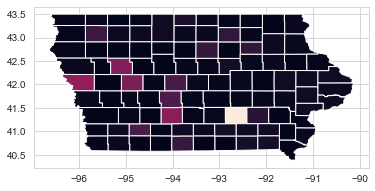

In [64]:
iowa_counties_shapes.plot(column=years_county_df[2012][:99])

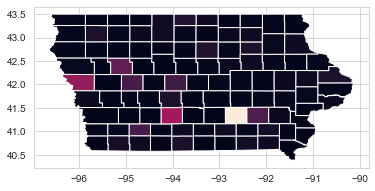

In [427]:
iowa_counties_shapes.plot(column=years_county_df[2013][:99])

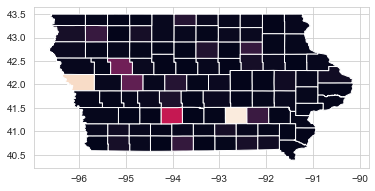

In [428]:
iowa_counties_shapes.plot(column=years_county_df[2014][:99])

iowa_counties_shapes.plot(column=years_county_df[2012][:99],legend=True,legend_kwds={'label': "Sale (Dollars)",'orientation': "horizontal"})
iowa_counties_shapes.plot(column=years_county_df[2013][:99],legend=True,legend_kwds={'label': "Sale (Dollars)",'orientation': "horizontal"})
iowa_counties_shapes.plot(column=years_county_df[2014][:99],legend=True,legend_kwds={'label': "Sale (Dollars)",'orientation': "horizontal"})
iowa_counties_shapes.plot(column=years_county_df[2015][:99],legend=True,legend_kwds={'label': "Sale (Dollars)",'orientation': "horizontal"})
iowa_counties_shapes.plot(column=years_county_df[2016][:99],legend=True,legend_kwds={'label': "Sale (Dollars)",'orientation': "horizontal"})
iowa_counties_shapes.plot(column=years_county_df[2017][:99],legend=True,legend_kwds={'label': "Sale (Dollars)",'orientation': "horizontal"})
iowa_counties_shapes.plot(column=years_county_df[2018][:99],legend=True,legend_kwds={'label': "Sale (Dollars)",'orientation': "horizontal"})


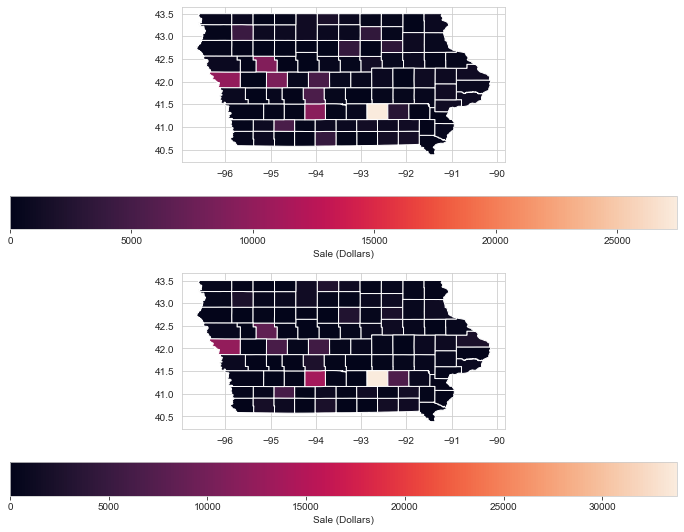

In [77]:
fig, axs = plt.subplots(2, 1, figsize=(18,9),sharey=True)
iowa_counties_shapes.plot(column=years_county_df[2012][:99],legend=True,legend_kwds={'label': "Sale (Dollars)",'orientation': "horizontal"},ax=axs[0])
iowa_counties_shapes.plot(column=years_county_df[2013][:99],legend=True,legend_kwds={'label': "Sale (Dollars)",'orientation': "horizontal"},ax=axs[1])


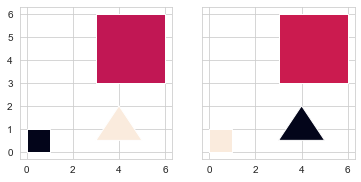

In [80]:
from shapely import geometry

p1 = geometry.Polygon([(0,0),(0,1),(1,1),(1,0)])
p2 = geometry.Polygon([(3,3),(3,6),(6,6),(6,3)])
p3 = geometry.Polygon([(3,.5),(4,2),(5,.5)])

gdf = geo.GeoDataFrame(dict(
        geometry=[p1, p2, p3],
        Value1=[1, 10, 20],
        Value2=[300, 200, 100],
))

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)
gdf.plot(ax=ax1, column='Value1')
gdf.plot(ax=ax2, column='Value2')

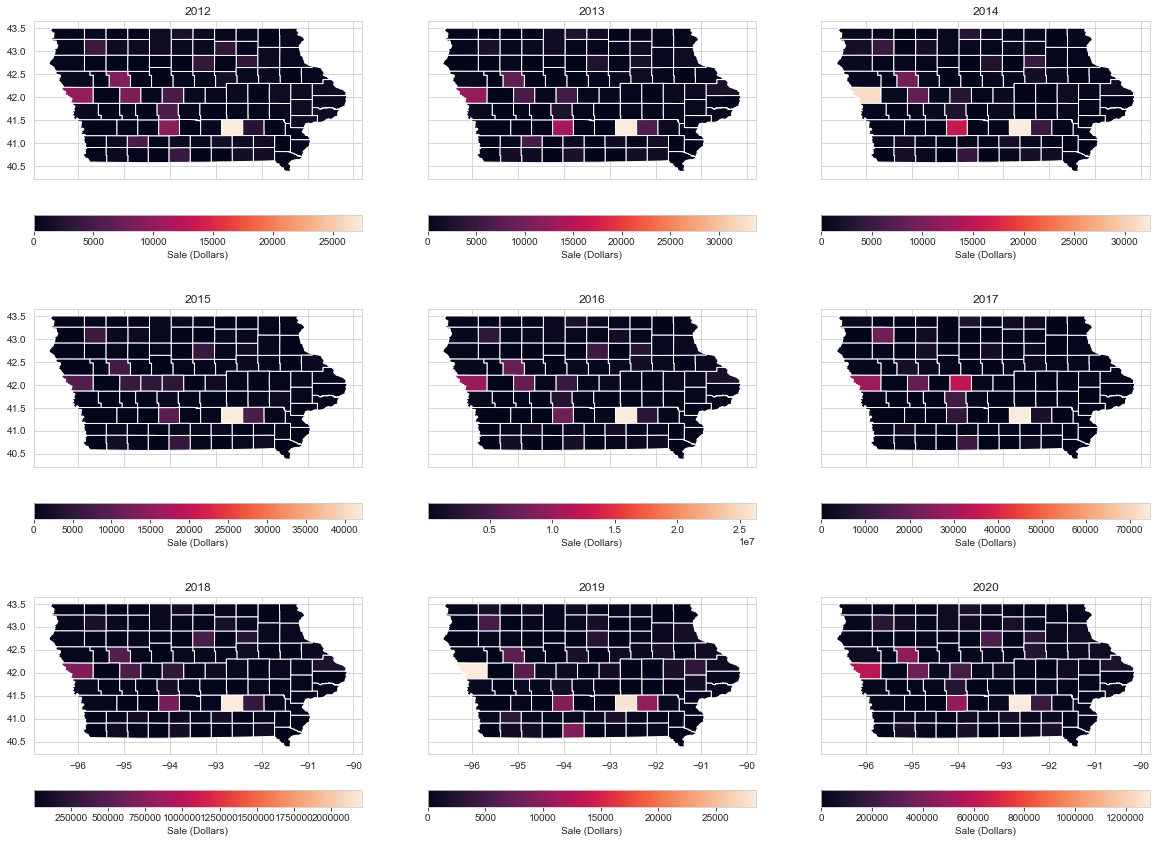

In [114]:
fig, axs = plt.subplots(3,3, sharex=True, sharey=True,figsize=(20,15))
axs[0,0].title.set_text('2012')
axs[0,1].title.set_text('2013')
axs[0,2].title.set_text('2014')
axs[1,0].title.set_text('2015')
axs[1,1].title.set_text('2016')
axs[1,2].title.set_text('2017')
axs[2,0].title.set_text('2018')
axs[2,1].title.set_text('2019')
axs[2,2].title.set_text('2020')
iowa_counties_shapes.plot(ax=axs[0,0], column=years_county_df[2012][:99],legend=True,legend_kwds={'label': "Sale (Dollars)",'orientation': "horizontal"})
iowa_counties_shapes.plot(ax=axs[0,1], column=years_county_df[2013][:99],legend=True,legend_kwds={'label': "Sale (Dollars)",'orientation': "horizontal"})
iowa_counties_shapes.plot(ax=axs[0,2], column=years_county_df[2014][:99],legend=True,legend_kwds={'label': "Sale (Dollars)",'orientation': "horizontal"})
iowa_counties_shapes.plot(ax=axs[1,0], column=years_county_df[2015][:99],legend=True,legend_kwds={'label': "Sale (Dollars)",'orientation': "horizontal"})
iowa_counties_shapes.plot(ax=axs[1,1], column=years_county_df[2016][:99],legend=True,legend_kwds={'label': "Sale (Dollars)",'orientation': "horizontal"})
iowa_counties_shapes.plot(ax=axs[1,2], column=years_county_df[2017][:99],legend=True,legend_kwds={'label': "Sale (Dollars)",'orientation': "horizontal"})
iowa_counties_shapes.plot(ax=axs[2,0], column=years_county_df[2018][:99],legend=True,legend_kwds={'label': "Sale (Dollars)",'orientation': "horizontal"})
iowa_counties_shapes.plot(ax=axs[2,1], column=years_county_df[2019][:99],legend=True,legend_kwds={'label': "Sale (Dollars)",'orientation': "horizontal"})
iowa_counties_shapes.plot(ax=axs[2,2], column=years_county_df[2020][:99],legend=True,legend_kwds={'label': "Sale (Dollars)",'orientation': "horizontal"})

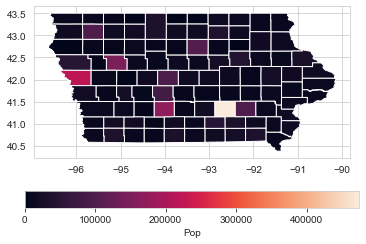

In [117]:
iowa_counties_shapes.plot(column=years_county_df['Total population'][:99],legend=True,legend_kwds={'label': "Pop",'orientation': "horizontal"})

In [123]:
years_county_df['Per Capital, MoM'].unique()

array([ 30.39469259,  10.88852925,  18.4882219 ,  37.21293525,
        13.61573532,  13.44057129,          inf,  27.0560275 ,
        34.53152974,  30.84589444,  10.55161181,  15.40927198,
        59.31842804,  44.69642559,  14.21212198,  32.6797977 ,
        14.57874948,  31.73476083,  49.86278612,  21.09374604,
        35.24103859,  37.25670792,  33.48874515,   6.0992583 ,
         8.7807633 ,  19.48152741, 126.06387078,  36.20806182,
        12.41488012,  24.30502383,  37.80402131,  15.2677716 ,
         2.54119834,  30.75591692,  13.72991897,  12.67732528,
        27.49964262,  15.88198475,  35.39974193,  10.32149049,
        27.93280187,  20.10758204,  38.94043383,  20.18747831,
        23.79741778,  33.31479557,  22.00625762,  24.80450241,
        54.44211488,  21.48766725,   4.17685294,  52.43402255,
        53.95550447,  51.84527415,   7.23969081,   3.16555659,
        13.12445492,  26.08776337,  21.40762383,  26.1693405 ,
        38.60246977,  14.57082904,  22.97340231,  32.72

In [136]:
years_county_df['Per Capita, MoM'] = years_county_df['Per Capita, MoM'].replace([np.inf, -np.inf], 0)

In [137]:
years_county_df['Per Capita, MoM'].unique()

array([ 30.39469259,  10.88852925,  18.4882219 ,  37.21293525,
        13.61573532,  13.44057129,   0.        ,  27.0560275 ,
        34.53152974,  30.84589444,  10.55161181,  15.40927198,
        59.31842804,  44.69642559,  14.21212198,  32.6797977 ,
        14.57874948,  31.73476083,  49.86278612,  21.09374604,
        35.24103859,  37.25670792,  33.48874515,   6.0992583 ,
         8.7807633 ,  19.48152741, 126.06387078,  36.20806182,
        12.41488012,  24.30502383,  37.80402131,  15.2677716 ,
         2.54119834,  30.75591692,  13.72991897,  12.67732528,
        27.49964262,  15.88198475,  35.39974193,  10.32149049,
        27.93280187,  20.10758204,  38.94043383,  20.18747831,
        23.79741778,  33.31479557,  22.00625762,  24.80450241,
        54.44211488,  21.48766725,   4.17685294,  52.43402255,
        53.95550447,  51.84527415,   7.23969081,   3.16555659,
        13.12445492,  26.08776337,  21.40762383,  26.1693405 ,
        38.60246977,  14.57082904,  22.97340231,  32.72

In [135]:
years_county_df['Per Capita, MoM'] = years_county_df['All'] / years_county_df['Total population']

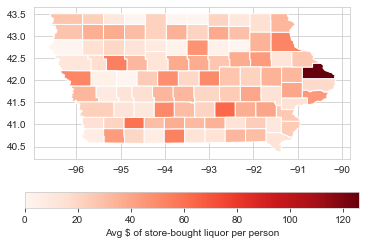

In [152]:
iowa_counties_shapes.plot(column=years_county_df['Per Capita, MoM'][:99],legend=True,legend_kwds={'label': "Avg $ of store-bought liquor per person",'orientation': "horizontal"},cmap='Reds')

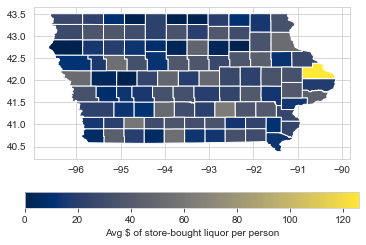

In [153]:
iowa_counties_shapes.plot(column=years_county_df['Per Capita, MoM'][:99],legend=True,legend_kwds={'label': "Avg $ of store-bought liquor per person",'orientation': "horizontal"},cmap='cividis')

lets do a bit of visualization with liquor types

In [182]:
liquor_df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year
0,INV-26826500064,04/24/2020,2550,Hy-Vee Food Store / Osceola,510 West Mclane,Osceola,50213,POINT (-93.77321 41.030569),20.0,CLARKE,...,UV Blue Raspberry,6,"1,750",11.5,17.25,2,32.98,3.50,0.92,2020
1,INV-26837100046,04/27/2020,2648,Hy-Vee #4 / WDM,555 S 51st St,West Des Moines,50265,POINT (-93.773557 41.561197),77.0,POLK,...,Foundry Gin,12,375,6.66,9.99,6,59.94,2.25,0.59,2020
2,INV-26850900034,04/27/2020,5708,Brothers Market,103 W. Walnut,Williamsburg,52361,POINT (-91.831646 41.881618),48.0,IOWA,...,Dekuyper Strawberry Pucker,12,750,6.5,9.75,3,29.25,2.25,0.59,2020
3,INV-26840600004,04/27/2020,2614,Hy-Vee #3 Food & Drugstore / Davenport,1823 E Kimberly Rd,Davenport,52807,POINT (-90.548919 41.55678100000001),82.0,SCOTT,...,Bacardi Bahama Mama RTS,6,"1,750",9.53,14.3,6,85.80,10.50,2.77,2020
4,INV-26828600009,04/24/2020,3660,Wal-Mart 2935 / Knoxville,814 W Bell Ave,Knoxville,50138,POINT (-93.106728 41.306176),63.0,MARION,...,Dr McGillicuddys Cherry,12,"1,000",11,16.5,12,198.00,12.00,3.17,2020


In [181]:
liquor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4418995 entries, 0 to 4999999
Data columns (total 25 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   string 
 6   Zip Code               object 
 7   Store Location         object 
 8   County Number          float64
 9   County                 object 
 10  Category               float64
 11  Category Name          object 
 12  Vendor Number          float64
 13  Vendor Name            object 
 14  Item Number            object 
 15  Item Description       object 
 16  Pack                   int64  
 17  Bottle Volume (ml)     object 
 18  State Bottle Cost      object 
 19  State Bottle Retail    object 
 20  Bottles Sold           int64  
 21  Sale (Dollars)         float64
 22  Volume Sold (Liter

In [211]:
bottles_by_kind_group = liquor_df['Sale (Dollars)'].groupby(liquor_df['Category Name Standard'])

In [227]:
bottles_by_kind_group.sum().sort_values(axis=0,ascending=False)

Category Name Standard
CANADIAN WHISKIES                       7.706974e+07
AMERICAN VODKAS                         7.091368e+07
SPICED RUM                              4.336817e+07
STRAIGHT BOURBON WHISKIES               3.734949e+07
IMPORTED VODKAS                         3.437385e+07
WHISKEY LIQUEUR                         3.189436e+07
TENNESSEE WHISKIES                      2.792701e+07
100% AGAVE TEQUILA                      1.645668e+07
BLENDED WHISKIES                        1.597704e+07
VODKA 80 PROOF                          1.576264e+07
IMPORTED BRANDIES                       1.545207e+07
AMERICAN FLAVORED VODKA                 1.409229e+07
MIXTO TEQUILA                           1.282698e+07
FLAVORED RUM                            1.256338e+07
IRISH WHISKIES                          1.244188e+07
IMPORTED CORDIALS & LIQUEURS            1.243852e+07
CREAM LIQUEURS                          1.234857e+07
SCOTCH WHISKIES                         1.047182e+07
WHITE RUM              

In [187]:
#OK, let's try and clean up the names a bit......... UGH
liquor_df['Category Name'] = liquor_df['Category Name'].astype(str)

In [188]:
#OK, let's try and clean up the names a bit......... UGH
liquor_df['Category Name'] = liquor_df['Category Name'].map(str.upper)

In [191]:
#make a copy so as not to bothah the originals
liquor_df['Category Name Standard'] = liquor_df['Category Name']

In [216]:
liquor_df['Category Name Standard'].replace(to_replace={'TEMPORARY & SPECIALTY PACKAGES':'SPECIALTY PACKAGES',
                                               'DECANTERS & SPECIALTY PACKAGES':'SPECIALTY PACKAGES',
                                               'IMPORTED VODKA':"IMPORTED VODKAS",
                                               'POTTAWATTA':'POTTAWATTAMIE',
                                               'TEMPORARY &  SPECIALTY PACKAGES':'SPECIALTY PACKAGES',
                                               'AMERICAN CORDIALS & LIQUEUR':'AMERICAN CORDIALS & LIQUEURS',
                                               'IMPORTED CORDIALS & LIQUEUR':'IMPORTED CORDIALS & LIQUEURS',
                                               'IMPORTED DISTILLED SPIRIT SPECIALTY':'IMPORTED DISTILLED SPIRITS SPECIALTY',
                                               'AMERICAN DISTILLED SPIRIT SPECIALTY':'AMERICAN DISTILLED SPIRITS SPECIALTY',
                                               'FLAVORED GIN':'FLAVORED GINS',
                                               'AMERICAN VODKA':'AMERICAN VODKAS',
                                               'AMARETTO - IMPORTED':'IMPORTED AMARETTO',
                                               'COCKTAILS /RTD':'COCKTAILS / RTD',
                                               'GRAPE SCHNAPPS':'FRUIT SCHNAPPS',
                                               'WATERMELON SCHNAPPS':'FRUIT SCHNAPPS',
                                               'APPLE SCHNAPPS':'FRUIT SCHNAPPS',
                                               'PEACH SCHNAPPS':'FRUIT SCHNAPPS',
                                               'STRAWBERRY SCHNAPPS':'FRUIT SCHNAPPS',
                                               'RASPBERRY SCHNAPPS':'FRUIT SCHNAPPS',
                                               'TROPICAL FRUIT SCHNAPPS':'FRUIT SCHNAPPS',
                                               'CINNAMON SCHNAPPS':'NON-FRUIT SCHNAPPS',
                                               'MISCELLANEOUS SCHNAPPS':'NON-FRUIT SCHNAPPS',
                                               'SAVORY SCHNAPPS':'NON-FRUIT SCHNAPPS',
                                               'PEPPERMINT SCHNAPPS':'NON-FRUIT SCHNAPPS',
                                               'BUTTERSCOTCH SCHNAPPS':'NON-FRUIT SCHNAPPS',
                                               'SPEARMINT SCHNAPPS':'NON-FRUIT SCHNAPPS',
                                               'ROOT BEER SCHNAPPS':'NON-FRUIT SCHNAPPS',
                                               'CHERRY BRANDIES':'FRUIT BRANDIES',
                                               'PEACH BRANDIES':'FRUIT BRANDIES',
                                               'APRICOT BRANDIES':'FRUIT BRANDIES',
                                               'BLACKBERRY BRANDIES':'FRUIT BRANDIES',
                                               'AMERICAN GRAPE BRANDIES':'AMERICAN BRANDIES',
                                               'DARK CREME DE CACAO':'CREME STUFF',
                                               'WHITE CREME DE CACAO':'CREME STUFF',
                                               'GREEN CREME DE MENTHE':'CREME STUFF',
                                               'CREME DE ALMOND':'CREME STUFF',
                                               'WHITE CREME DE MENTHE':'CREME STUFF',
                                              },inplace=True)

In [185]:
#i messed up the group so i had to re-import the category names
#liquor_df['Category Name'] = pd.read_csv(r'C:/Users/douge/Python Notebooks/Iowa_Liquor_Sales.csv',usecols=['Category Name'],nrows=5000000)

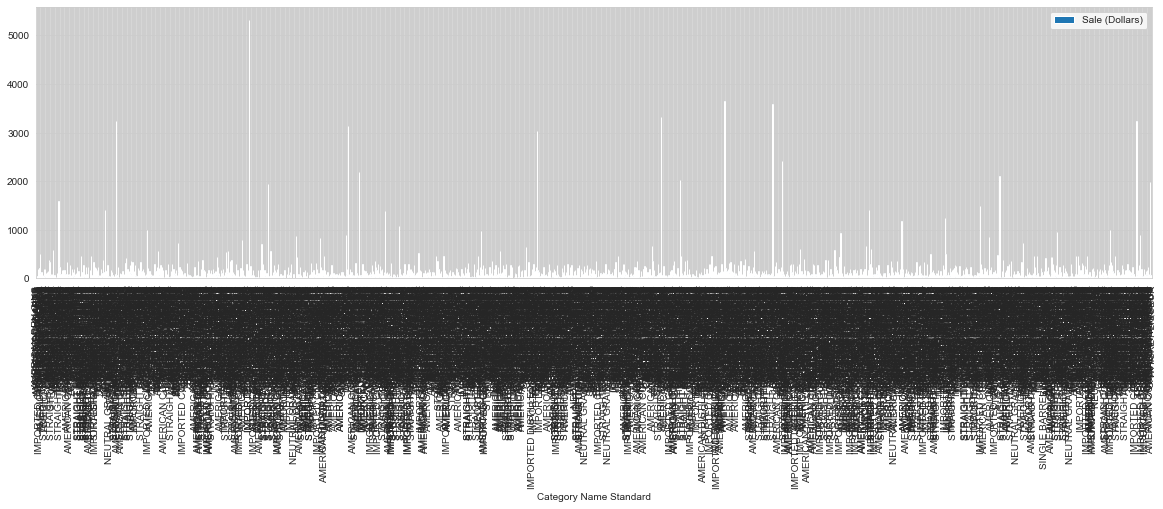

In [213]:
liquor_df[1:2000].plot(x='Category Name Standard',y='Sale (Dollars)',kind='bar',figsize=(20,5))

In [224]:
most_popular_liquor_by_county_pivot = pd.pivot_table(liquor_df,'Sale (Dollars)','Category Name Standard','County',aggfunc='sum')

In [225]:
most_popular_liquor_by_county_pivot

County,ADAIR,ADAMS,ALLAMAKEE,APPANOOSE,AUDUBON,BENTON,BLACK HAWK,BOONE,BREMER,BUCHANAN,BUENA VISTA,BUTLER,CALHOUN,CARROLL,CASS,CEDAR,CERRO GORDO,CHEROKEE,CHICKASAW,CLARKE,CLAY,CLAYTON,CLINTON,CRAWFORD,DALLAS,DAVIS,DECATUR,DELAWARE,DES MOINES,DICKINSON,DUBUQUE,EMMET,FAYETTE,FLOYD,FRANKLIN,FREMONT,GREENE,GRUNDY,GUTHRIE,HAMILTON,HANCOCK,HARDIN,HARRISON,HENRY,HOWARD,HUMBOLDT,IDA,IOWA,JACKSON,JASPER,JEFFERSON,JOHNSON,JONES,KEOKUK,KOSSUTH,LEE,LINN,LOUISA,LUCAS,LYON,MADISON,MAHASKA,MARION,MARSHALL,MILLS,MITCHELL,MONONA,MONROE,MONTGOMERY,MUSCATINE,O'BRIEN,OSCEOLA,PAGE,PALO ALTO,PLYMOUTH,POCAHONTAS,POLK,POTTAWATTAMIE,POWESHIEK,RINGGOLD,SAC,SCOTT,SHELBY,SIOUX,STORY,TAMA,TAYLOR,UNION,VAN BUREN,WAPELLO,WARREN,WASHINGTON,WAYNE,WEBSTER,WINNEBAGO,WINNESHIEK,WOODBURY,WORTH,WRIGHT
Category Name Standard,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100 PROOF VODKA,NaN,NaN,355.32,342.00,NaN,185.25,8964.33,1570.53,440.40,592.98,512.85,56.43,NaN,2691.96,469.77,1020.09,6493.20,192.18,NaN,67.14,1039.20,109.88,1302.52,188.40,2673.03,57.00,NaN,NaN,1006.95,1456.44,1220.75,67.26,1055.16,2261.28,NaN,NaN,339.72,323.85,685.32,520.86,NaN,1105.32,NaN,1393.50,NaN,587.19,144.00,171.00,NaN,705.97,942.39,9828.31,56.43,NaN,1666.17,1475.18,9.960380e+03,42.75,NaN,93.30,387.00,857.25,544.48,1667.52,NaN,212.10,200.63,112.86,428.79,1451.18,626.07,76.50,199.50,225.66,218.37,349.50,4.236814e+04,2196.03,606.48,NaN,NaN,5033.06,NaN,227.43,8884.27,194.37,NaN,733.26,NaN,989.13,365.59,636.75,NaN,1992.59,1421.16,640.68,4527.42,NaN,2252.49
100% AGAVE TEQUILA,10685.64,696.34,9554.85,23287.61,2753.95,13208.46,965115.59,58133.98,46890.30,27270.30,129020.90,2404.33,3483.66,63089.24,21666.98,7010.37,304818.20,18592.95,5732.94,23127.91,45834.74,12875.66,160854.27,88477.60,411058.32,671.57,1603.77,12737.88,129549.02,126027.96,385407.54,31591.45,22934.26,43571.47,26021.25,NaN,11784.20,3937.78,4105.96,31409.66,3915.04,24173.09,7243.46,29892.59,16953.45,22220.49,9540.20,36925.17,15157.29,45536.70,50915.55,1177341.37,39569.40,2006.75,45365.42,117203.47,1.565087e+06,9379.17,435.84,7574.56,28167.85,25874.07,63155.43,263767.02,10093.85,12979.35,11909.44,7342.50,22250.88,175536.74,30503.49,10652.71,35355.45,14136.93,55113.54,4113.72,5.298258e+06,721316.62,42840.39,3774.02,22858.21,1415258.98,31240.81,73122.84,321624.91,26629.30,3986.40,26609.58,1519.97,63505.64,19603.83,89211.65,497.09,172154.86,10492.91,34411.68,768554.98,4194.36,20628.66
AGED DARK RUM,182.82,12.30,262.88,2300.32,88.52,2196.68,57701.68,3846.34,8958.37,1779.71,4490.35,301.23,127.14,3285.96,661.60,498.75,16641.44,1601.81,NaN,1805.52,2757.78,613.64,7785.03,430.08,10038.81,135.00,15.11,477.25,9474.33,6645.48,14046.52,401.52,1480.32,3475.09,2584.54,NaN,401.82,20.88,92.25,1437.39,303.00,1389.11,830.79,3352.20,1440.10,837.09,163.32,3529.10,1218.01,3876.90,7260.45,120325.37,1468.52,588.00,2795.43,6437.48,8.772362e+04,294.36,NaN,30.00,1761.27,1457.19,3257.49,7162.60,1227.99,141.30,1724.53,1697.94,1033.36,10215.17,3471.49,224.52,6120.03,230.82,1729.40,75.00,2.484192e+05,33139.35,2164.90,52.20,235.25,65370.47,605.47,3330.18,27726.39,504.68,NaN,437.52,60.00,6185.25,666.87,3082.12,NaN,8590.53,2287.91,7235.47,26856.65,132.36,598.86
AMERICAN ALCOHOL,108.00,27.00,594.00,1688.10,NaN,775.36,10755.65,1366.20,2333.60,1498.50,1126.36,310.50,94.50,1957.50,972.00,837.00,3919.42,972.00,135.00,526.50,1188.00,362.72,3618.00,683.16,958.50,86.86,148.50,458.88,2561.20,1245.42,3977.10,1053.00,810.00,1428.48,133.22,NaN,512.88,81.00,NaN,769.50,459.00,1350.00,162.00,1944.00,648.00,769.50,162.00,809.88,1741.50,918.00,1700.52,12774.42,2497.50,40.50,2403.74,2406.68,1.517130e+04,NaN,NaN,77.18,324.00,1107.00,1756.04,2038.26,472.50,409.46,797.66,850.50,675.06,3058.55,545.53,391.50,729.00,202.50,1552.50,310.50,2.345478e+04,3718.86,1174.50,162.00,1633.50,12014.13,162.00,432.00,7524.88,797.84,13.50,1066.50,NaN,2303.88,650.82,1317.84,162.00,1701.00,837.00,1498.50,4878.55,702.00,216.00
AMERICAN AMARETTO,65.91,45.61

In [226]:
#ok. not that interesting.
most_popular_liquor_by_county_pivot.idxmax()

County
ADAIR            CANADIAN WHISKIES
ADAMS            CANADIAN WHISKIES
ALLAMAKEE        CANADIAN WHISKIES
APPANOOSE        CANADIAN WHISKIES
AUDUBON          CANADIAN WHISKIES
BENTON           CANADIAN WHISKIES
BLACK HAWK       CANADIAN WHISKIES
BOONE            CANADIAN WHISKIES
BREMER           CANADIAN WHISKIES
BUCHANAN         CANADIAN WHISKIES
BUENA VISTA      CANADIAN WHISKIES
BUTLER           CANADIAN WHISKIES
CALHOUN          CANADIAN WHISKIES
CARROLL          CANADIAN WHISKIES
CASS             CANADIAN WHISKIES
CEDAR            CANADIAN WHISKIES
CERRO GORDO      CANADIAN WHISKIES
CHEROKEE         CANADIAN WHISKIES
CHICKASAW        CANADIAN WHISKIES
CLARKE           CANADIAN WHISKIES
CLAY             CANADIAN WHISKIES
CLAYTON          CANADIAN WHISKIES
CLINTON            AMERICAN VODKAS
CRAWFORD         CANADIAN WHISKIES
DALLAS             AMERICAN VODKAS
DAVIS            CANADIAN WHISKIES
DECATUR          CANADIAN WHISKIES
DELAWARE         CANADIAN WHISKIES
DES MOINES   

In [ ]:
#yes, let's do try to visualize stores as points on the map.

In [235]:
stores_group = liquor_df['Sale (Dollars)'].groupby(liquor_df['Store Name'])

In [264]:
stores_group_df = pd.DataFrame(stores_group.sum().sort_values(axis=0,ascending=False))

In [254]:
stores_group_df = pd.DataFrame(data=stores_group,columns=['Store Name','$'])

In [251]:
stores_group.sum().sort_values(axis=0,ascending=False)

Store Name
Hy-Vee #3 / BDI / Des Moines                      2.294824e+07
Central City 2                                    2.139730e+07
Hy-Vee Wine and Spirits / Iowa City               1.006734e+07
Sam's Club 8162 / Cedar Rapids                    7.773742e+06
Wilkie Liquors                                    6.495918e+06
Lot-A-Spirits                                     6.055376e+06
Hy-Vee Food Store / Coralville                    5.934266e+06
Benz Distributing                                 5.547355e+06
Sam's Club 8238 / Davenport                       5.337622e+06
Costco Wholesale #788                             4.925986e+06
Hy-Vee Wine and Spirits / WDM                     4.487427e+06
Sam's Club 6979 / Ankeny                          4.395430e+06
Sam's Club 6432 / Sioux City                      4.299573e+06
Iowa Street Market, Inc.                          4.287117e+06
Hy-Vee / Waukee                                   4.262272e+06
Sam's Club 6514 / Waterloo                  

In [271]:
stores_group_df.head(10)

,Store Name,Sale (Dollars)
0,Hy-Vee #3 / BDI / Des Moines,2.294824e+07
1,Central City 2,2.139730e+07
2,Hy-Vee Wine and Spirits / Iowa City,1.006734e+07
3,Sam's Club 8162 / Cedar Rapids,7.773742e+06
4,Wilkie Liquors,6.495918e+06
5,Lot-A-Spirits,6.055376e+06
6,Hy-Vee Food Store / Coralville,5.934266e+06
7,Benz Distributing,5.547355e+06
8,Sam's Club 8238 / Davenport,5.337622e+06
9,Costco Wholesale #788,4.925986e+06


In [270]:
stores_group_df.reset_index(inplace=True)

In [279]:
liquor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4418995 entries, 0 to 4999999
Data columns (total 26 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Invoice/Item Number     object 
 1   Date                    object 
 2   Store Number            int64  
 3   Store Name              object 
 4   Address                 object 
 5   City                    string 
 6   Zip Code                object 
 7   Store Location          object 
 8   County Number           float64
 9   County                  object 
 10  Category                float64
 11  Category Name           object 
 12  Vendor Number           float64
 13  Vendor Name             object 
 14  Item Number             object 
 15  Item Description        object 
 16  Pack                    int64  
 17  Bottle Volume (ml)      object 
 18  State Bottle Cost       object 
 19  State Bottle Retail     object 
 20  Bottles Sold            int64  
 21  Sale (Dollars)          float64

In [274]:
stores_group_df['Store Name'] = stores_group_df['Store Name'].astype(str)

In [278]:
liquor_df['Store Name'] = liquor_df['Store Name'].astype(str)

In [294]:
stores_group_df.head()

,Store Name,Sale (Dollars)
0,Hy-Vee #3 / BDI / Des Moines,2.294824e+07
1,Central City 2,2.139730e+07
2,Hy-Vee Wine and Spirits / Iowa City,1.006734e+07
3,Sam's Club 8162 / Cedar Rapids,7.773742e+06
4,Wilkie Liquors,6.495918e+06


In [432]:
stupid_repeat_stores_df = pd.merge(stores_group_df,liquor_df[['Store Name','Store Location']],on='Store Name', how='outer')

In [433]:
unique_stores_address_df = stupid_repeat_stores_df.drop_duplicates()

In [434]:
unique_stores_address_df = stupid_repeat_stores_df.drop_duplicates(subset ='Store Name', keep='first')

In [360]:
unique_stores_address_df.set_index('Store Name',inplace=True)

In [426]:
unique_stores_address_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2124 entries, 0 to 4418994
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store Name      2124 non-null   object 
 1   Sale (Dollars)  2124 non-null   float64
 2   Store Location  2124 non-null   object 
 3   Lat             2124 non-null   object 
 4   Long            2124 non-null   object 
dtypes: float64(1), object(4)
memory usage: 99.6+ KB


In [453]:
unique_stores_address_df

,Store Name,Sale (Dollars),Long2,Lat2
0,Hy-Vee #3 / BDI / Des Moines,2.294824e+07,-93.596754,41.554101
1,Central City 2,2.139730e+07,-93.613739,41.60572
2,Hy-Vee Wine and Spirits / Iowa City,1.006734e+07,-91.53046300000001,41.642764
3,Sam's Club 8162 / Cedar Rapids,7.773742e+06,-91.67969,42.031819
4,Wilkie Liquors,6.495918e+06,-91.410401,41.918328
5,Lot-A-Spirits,6.055376e+06,-90.48065,41.529655
6,Hy-Vee Food Store / Coralville,5.934266e+06,-91.591868,41.682337000000004
7,Benz Distributing,5.547355e+06,-91.659875,41.97574
8,Sam's Club 8238 / Davenport,5.337622e+06,-90.527081,41.559731
9,Costco Wholesale #788,4.925986e+06,-93.806489,41.561342


In [452]:
unique_stores_address_df.drop(['index'],inplace=True,axis=1)

C:\Users\douge\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [449]:
unique_stores_address_df.reset_index(inplace=True)

In [444]:
unique_stores_address_df.drop(['Store Location'],axis=1,inplace=True)

C:\Users\douge\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [435]:
unique_stores_address_df['Lat'], unique_stores_address_df['Long'] = unique_stores_address_df['Store Location'].str.rsplit(' ', 1).str

C:\Users\douge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.
C:\Users\douge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [436]:
unique_stores_address_df['drop'], unique_stores_address_df['Lat'] = unique_stores_address_df['Lat'].str.rsplit('(').str

C:\Users\douge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.
C:\Users\douge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [437]:
unique_stores_address_df['Long'] = unique_stores_address_df['Long'].str.rsplit(')',expand=True)

C:\Users\douge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [438]:
unique_stores_address_df.drop(['drop'],axis=1,inplace=True)

C:\Users\douge\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [483]:
gdf = geo.GeoDataFrame(unique_stores_address_df, geometry=geo.points_from_xy(unique_stores_address_df.Long2, unique_stores_address_df.Lat2))
# must be real number, not str

In [529]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2123 entries, 0 to 2123
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Store Name          2123 non-null   object  
 1   Sale (Dollars)      2123 non-null   float64 
 2   Long2               2123 non-null   float64 
 3   Lat2                2123 non-null   float64 
 4   geometry            2123 non-null   geometry
 5   Normalized Dollars  2123 non-null   float64 
dtypes: float64(4), geometry(1), object(1)
memory usage: 116.1+ KB


Text(-90.8, 41.4041, 'Davenport')

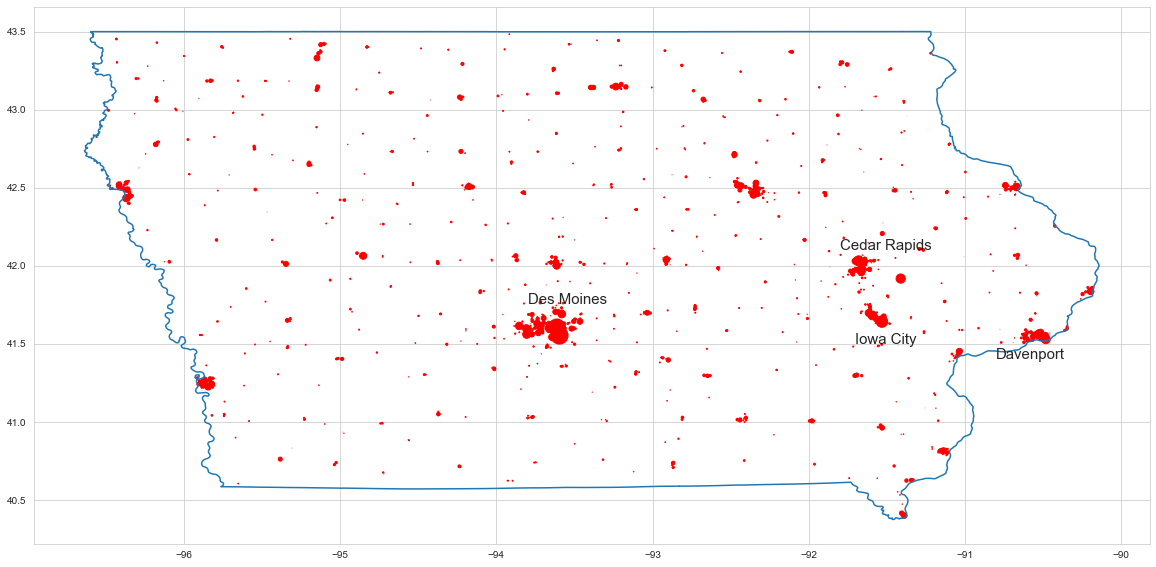

In [595]:
fig, ax = plt.subplots(1, 1,figsize=(20,10))
iowa_state_shape.boundary.plot(ax=ax);
gdf.plot(ax=ax, marker='o', color='red', markersize=(gdf['Normalized Dollars']*300))
plt.text(-93.8, 41.75410,s='Des Moines',fontsize=15)
plt.text(-91.7, 41.5010,s='Iowa City',fontsize=15)
plt.text(-91.8, 42.10410,s='Cedar Rapids',fontsize=15)
plt.text(-90.8, 41.40410,s='Davenport',fontsize=15)

In [528]:
#ratio - normalizing amounts to be values between 0 and 1
gdf['Normalized Dollars'] = gdf['Sale (Dollars)'] / gdf['Sale (Dollars)'].max()

In [585]:
gdf.head()

,Store Name,Sale (Dollars),Long2,Lat2,geometry,Normalized Dollars,State
0,Hy-Vee #3 / BDI / Des Moines,2.294824e+07,-93.596754,41.554101,POINT (-93.59675 41.55410),1.000000,Iowa
1,Central City 2,2.139730e+07,-93.613739,41.605720,POINT (-93.61374 41.60572),0.932416,Iowa
2,Hy-Vee Wine and Spirits / Iowa City,1.006734e+07,-91.530463,41.642764,POINT (-91.53046 41.64276),0.438698,Iowa
3,Sam's Club 8162 / Cedar Rapids,7.773742e+06,-91.679690,42.031819,POINT (-91.67969 42.03182),0.338751,Iowa
4,Wilkie Liquors,6.495918e+06,-91.410401,41.918328,POINT (-91.41040 41.91833),0.283068,Iowa


In [589]:
iowa_counties_shapes['State'] = 'Iowa'

C:\Users\douge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [591]:
iowa_state_shape = iowa_counties_shapes.dissolve(by='State')

In [590]:
iowa_counties_shapes.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,Name,Postal Code,State
97,19,175,00465276,0500000US19175,19175,Union,06,1097235806,5575853,"POLYGON ((-94.47101 41.04705, -94.47075 41.057...",Iowa,IA,Iowa
148,19,001,00465190,0500000US19001,19001,Adair,06,1474404193,2597996,"POLYGON ((-94.70072 41.46725, -94.70057 41.482...",Iowa,IA,Iowa
149,19,045,00465211,0500000US19045,19045,Clinton,06,1799818638,39526958,"POLYGON ((-90.89894 41.91853, -90.89807 41.920...",Iowa,IA,Iowa
150,19,083,00465230,0500000US19083,19083,Hardin,06,1474505075,1776735,"POLYGON ((-93.49948 42.55770, -93.48076 42.557...",Iowa,IA,Iowa
151,19,111,00465244,0500000US19111,19111,Lee,06,1340448548,55266733,"POLYGON ((-91.71879 40.81354, -91.68010 40.813...",Iowa,IA,Iowa


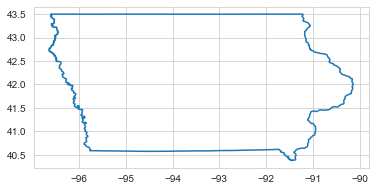

In [593]:
iowa_state_shape.boundary.plot();

In [481]:
unique_stores_address_df.drop(unique_stores_address_df[unique_stores_address_df['Lat2'] > 45].index, inplace = True)

C:\Users\douge\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [456]:
unique_stores_address_df['Long2'] = unique_stores_address_df['Long2'].astype('float')

C:\Users\douge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [458]:
unique_stores_address_df['Lat2'] = unique_stores_address_df['Lat2'].astype('float')

C:\Users\douge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [440]:
unique_stores_address_df.rename(columns={'Lat':'Long2','Long':'Lat2'},inplace=True)

In [430]:
unique_stores_address_df = unique_stores_address_df['Lat2'].astype('float')

In [229]:
stores_group.sum().sort_values(axis=0,ascending=False)

Store Name
Hy-Vee #3 / BDI / Des Moines                      2.294824e+07
Central City 2                                    2.139730e+07
Hy-Vee Wine and Spirits / Iowa City               1.006734e+07
Sam's Club 8162 / Cedar Rapids                    7.773742e+06
Wilkie Liquors                                    6.495918e+06
Lot-A-Spirits                                     6.055376e+06
Hy-Vee Food Store / Coralville                    5.934266e+06
Benz Distributing                                 5.547355e+06
Sam's Club 8238 / Davenport                       5.337622e+06
Costco Wholesale #788                             4.925986e+06
Hy-Vee Wine and Spirits / WDM                     4.487427e+06
Sam's Club 6979 / Ankeny                          4.395430e+06
Sam's Club 6432 / Sioux City                      4.299573e+06
Iowa Street Market, Inc.                          4.287117e+06
Hy-Vee / Waukee                                   4.262272e+06
Sam's Club 6514 / Waterloo                  

fig = plt.figure(constrained_layout=True)

gs = GridSpec(3, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
///// identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[1, :-1])
ax3 = fig.add_subplot(gs[1:, -1])
ax4 = fig.add_subplot(gs[-1, 0])
ax5 = fig.add_subplot(gs[-1, -2])

fig.suptitle("GridSpec")


plt.show()

In [ ]:
iowa_counties_shapes.plot(column=ninetynine)

In [343]:
usa_state_counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3233 entries, 0 to 3232
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   STATEFP      3233 non-null   int64   
 1   COUNTYFP     3233 non-null   object  
 2   COUNTYNS     3233 non-null   object  
 3   AFFGEOID     3233 non-null   object  
 4   GEOID        3233 non-null   object  
 5   NAME         3233 non-null   object  
 6   LSAD         3233 non-null   object  
 7   ALAND        3233 non-null   int64   
 8   AWATER       3233 non-null   int64   
 9   geometry     3233 non-null   geometry
 10  Name         3232 non-null   string  
 11  Postal Code  3232 non-null   string  
dtypes: geometry(1), int64(3), object(6), string(2)
memory usage: 328.4+ KB


usa_df = df[df['adm1_code'].str.contains('USA')]